## <font color = teal> Example answers
    
<font color = teal>If you have any question about the provided example answers, please contant the responsible assistant Tuija Leinonen via mail (tuhlei@utu.fi) or Moodle.

------

# Data Analysis and Knowledge Discovery: Exercise 2, Supervised learning

The previous exercise was about <i>data understanding</i> and <i>data preparation</i>, which formed the basis for the modeling phase of the data mining process. Many modeling techniques make assumptions about data so the exploration and preparation phases can't be ignored. Now, as we have checked the validity of data and familiarized ourselves with it, we can move on to the next stage of the Cross-Industry Standard Process for Data Mining (CRISP-DM) which is <font color = darkorchid><i>modeling</i></font>.

The questions to be answered at this stage could be for example:

- What kind of model architecture best fits our data?
- How well does the model perform technically?
- Could we improve that performance?
- How the performance of the model is evaluated?

<i>Machine learning</i> is a subfield of artificial intelligence which provides automatic, objective and data-driven techniques for modeling the data. The machine learning algorithms aim to learn from data to make predictions. The two main branches of it are <i>supervised learning</i> and <i>unsupervised learning</i>.  In this exercise, we are going to use the former -- <font color = darkorchid><i>supervised learning</i></font> -- for classification and regression tasks.

For classification, data remains the same as in the previous exercise, but I've already cleaned it up for you. Some data pre-processing steps are still required to ensure that it's in an appropriate format, so that models can learn something from it. Even though we are not doing any major data exploration nor data preparation here this time, <i>you should <b>never</b> forget it in your future data analyses</i>.

-----

<b>General guidance for exercises</b>

- Answer <b>all</b> questions below, even if you can't get your script to fully work.
- Write clear and easily readable code, and include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots.
- You can add more code and markup cells, as long as the flow of the notebook stays readable and logical.
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a <b>completely</b> correct solution and also thorough analysis.
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from the course assistants.
- Note! Don't leave it to the last moment! No feedback service during weekends.

<font color = red size = 4><b>The deadline is 28 November at 18:00</b></font>. Late submissions will not be accepted unless there is a valid excuse for extending the deadline before the due date.

------

### Gather **all** packages needed for this notebook here:

You can use other packages as well, but this excercise can be completed with those below.

In [1]:
# NOTE! Whenever you're disabling warnings, you SHOULD know
# and understand WHY they occur!!

# Not to show FutureWarnings when using scipy==1.9.1
# FutureWarning :: In the future version of package, there will be changed behaviour
#                  (default values for arguments will be changed somehow).

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# ------------------------------------

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning package - scikit-learn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Ridge

# Show the plots inline in the notebook
%matplotlib inline

# ------------------------------------
# This is NOT necessary, but I like to use some styles in print outs :)

class color:
   GREEN = '\033[92m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   # Ends the styling
   END = '\033[0m'
    
# And to use this, simply just create it and call the variable you need as
print(color.UNDERLINE + 'This' + color.END,
      color.GREEN + 'is',
      color.RED + 'just',
      color.GREEN + 'an',
      color.BOLD + 'example' + color.END,
      color.RED + ':)')

This is just an example :)


______________
## <font color = lightcoral>1. Classification using k-nearest neighbors </font> 

We start exploring the world of data modeling by using <font color = darkorchid><b>K-Nearest Neightbors (k-NN) algorithm</b></font>. The k-NN algorithm is one of the classic supervised machine learning algorithms. It assumes that similar points are close to each other. 

In our case, we'll use the k-NN algorithm to **predict the presence of cardiovascular disease** using all the other variables as <font color = darkorchid><b>features</b></font> in the given data set. So, the target variable is <font color = darkorchid><b>cardio</b></font>.

But first, we need data for the task. The code for loading the data into the environment is provided for you. <font color = red>The code should work, but make sure, that you have the csv file of the data in the same directory where you have this notebook file.</font> 

***Exercise 1 A)*** 

Print the first 10 rows to check that everything is ok with the created dataframe.

*note: as said, the data remains the same, but cholesterol has been one-hot-encoded for you already. There's also a new variable gluc (about glucose levels), which is one-hot-encoded for you. It has the similar values as cholesterol originally does [normal, at risk, elevated]. Also, binary variables have been changed to [0,1] values.*


In [2]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Path for the data
data_path = 'ex2_cardio_data.csv'

# Create a dataframe
cardio_data = pd.read_csv(data_path, dtype='int')

In [3]:
### Code - 10 first row
display(cardio_data.head(10))

,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
0,22767,0,162,75,120,80,0,0,1,0,0,0,1,0,0,1
1,19102,0,164,80,140,90,0,0,1,0,0,0,1,0,0,1
2,23251,0,155,76,130,80,0,0,1,0,0,0,1,0,1,0
3,22651,1,169,65,120,80,0,0,1,0,0,0,1,0,0,1
4,21770,1,171,67,160,100,0,0,0,1,0,0,1,0,0,1
5,14651,1,170,70,120,80,0,0,1,0,0,0,1,0,0,1
6,17391,0,152,65,110,70,0,0,1,0,0,0,1,0,0,1
7,14792,0,165,65,120,70,0,0,1,0,0,0,1,0,0,1
8,15982,1,180,81,110,70,1,0,1,0,0,0,1,0,0,1
9,19589,0,156,60,120,90,0,0,1,0,0,0,1,0,0,1


----

We have the data so let's make use of it. 

To teach the k-NN algorithm (or any kind of machine learning algorithm) to recognize patterns, we are going to need <font color = darkorchid><b>training data</b></font>. But to test how well a model possibly learned those patterns, we'll need <font color = darkorchid><b>test data</b></font> which is new and unseen for the trained model. Keep in mind that the test set is not shown for the model before we are actually done with training. 

So, to **find the estimate for the performance of a model**, we are going to use this <font color = darkorchid><b>train-test split</b></font>. "Split" because we literally split the data into two sets.

Sometimes <font color = darkorchid>stratification</font> needs to be considered. It can be used to ensure that train and test sets contain the same proportions of samples of each target class as the original data set.

***Exercise 1 B)*** 

Gather the features as an array `features`, and the target variable as an array `labels`. Produce training and test data.  Divide the data **randomly** into training (80%) and test (20%) sets.

- Would it be a good idea to use stratification? **Explain** your decision.

<font color = teal><b><i> ----- Assistant's note -----</i></b></font>

<font color = teal>Some of you find it difficult to understand, what the 'labels' mean when I'm actually talking about a 'target variable'. Well, our target variable contains the 'labels' which we need to train a model in a supervised way. More about the supervised learing itself can be found from the course lecture slides <i>Principles of Modeling</i> (Moodle: Intro to supervised ML, K-nearest neighbours). </font>

In [4]:
### Code - Train-test split

# As we are going to use ALL THE OTHER BUT CARDIO as features, we can drop the cardio column like this
features = cardio_data.drop(columns=['cardio'])

# and as labels, basically just choose the cardio column as follows
labels = cardio_data['cardio']

# ------- WHY STRATIFICATION

# Checking the unique values in the cardio data
print(f'Unique values in the cardio column (in the original data): {labels.unique()}')
# -> two values (0,1) as it should be as it's about binary classification
print()

# The balance between these two classes is
print(color.RED + color.BOLD + 'Normalized label balance in the original data:' + color.END, 
      labels.value_counts(normalize=True), sep='\n')
# -> 0: 713 // 1: 287 -> use stratification for imbalanced data
print()

# Shape of the whole dataframe
print(f'The shape of the original dataframe: {cardio_data.shape}')
print()

# ------- TRAIN-TEST SPLIT

# Using train_test_split here to randomly split the data
# Setting stratify=labels as labels contain the class labels
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.2,
                                                                            stratify=labels,
                                                                            random_state=2022)

# And as we used stratification, we should have similar label balanced 
# in training and testing sets than the original dataset
print(color.RED + color.BOLD + 'Normalized label balance in the training set:' + color.END, 
      labels_train.value_counts(normalize=True), sep='\n')

print(color.RED + color.BOLD + 'Normalized label balance in the testing set:' + color.END, 
      labels_test.value_counts(normalize=True), sep='\n')
print()

print('The shapes of the ' + color.BOLD + color.GREEN + 'training' + color.END,
      f'features {features_train.shape}, and labels {labels_train.shape}')

print('The shapes of the ' + color.BOLD + color.GREEN + 'testing' + color.END,
      f'features {features_test.shape}, and labels {labels_test.shape}')

Unique values in the cardio column (in the original data): [0 1]

Normalized label balance in the original data:
0    0.713
1    0.287
Name: cardio, dtype: float64

The shape of the original dataframe: (1000, 16)

Normalized label balance in the training set:
0    0.7125
1    0.2875
Name: cardio, dtype: float64
Normalized label balance in the testing set:
0    0.715
1    0.285
Name: cardio, dtype: float64

The shapes of the training features (800, 15), and labels (800,)
The shapes of the testing features (200, 15), and labels (200,)


<font color = green><b><i> ----- Example answer -----</b></i></font>

<font color = green>Out of 1000 samples, there are 713 healthy individuals and 287 sick ones in the data set so I'd say it's a good idea to use stratifiation as the data is imbalanced. Stratification is used to ensure the similar proportion of each case (0 - healthy individuals and 1 - sick individuals) in both training and testing sets (Airola, 2022). As we can see from the printouts of the normalized label balances, the training and testing sets now have almost identical balance of each label as the original data set.</font>

------

<font color = green><b>References</b>
    
<font color = green>Airola, A. (2022). <i>Data Analysis and Knowledge Discovery - Model selection and evaluation</i>. Lecture slides.

-------

<font color = teal>Some questions for you to think about as quite many of you thought that there's no actual reason for stratification: </font>
    
<font color = teal>The function `train_test_split` <b>randomly</b> splits the data into train and test sets. What would happen if we had a 70/30 train-test split without stratification, and because of <i>terrible</i> bad luck 700 healthy individuals would end up in the training set? Because k-NN actually just stores the training data in the memory to make predictions based on it, could it ever "learn" (or in this case, memorize) anything about sick ones? </font>

----------

***Exercise 1 C)*** 

Scale the numeric features. 

- Remind yourself briefly why you need this step. 
- What can you say about scaling especially from the perspective of the k-NN algorithm?

*tip: You should now have **two** variables where you have the features divided into. Don't forget to scale the test data. Some good information about preprocessing and how to use it for train and test data can be found https://scikit-learn.org/stable/modules/preprocessing.html.*

<font color = teal><b><i> ----- Assistant's note -----</i></b></font>

<font color = teal>A great many of you either 1) used two different StandardScalers, 2) fitted one StandardScaler using both train and test features or 3) forgot the previously made train-test split and scaled the whole data which was then splitted into training and testing sets. First two ways end up with similar results but the scaler is used incorrectly. You need only <b>one scaler which you fit with training data</b>.</font>

<font color = teal>[As mentioned in the documentation of the StandardScaler class](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) you compute the standard score of a sample $x$ as follows:
    
$$
z = \frac{x-u}{s},
$$

<font color = teal>where $u$ refers to the <b>mean of the training data</b>, and $s$ to the <b>std of the training data</b>. So you need to use only one StandardScaler, which you first <b>fit with the training data</b> so that it computes the mean and the std from it (the `fit` function). Why only training data? It's ideal <b>not to leak</b> any information about the testing set to a model so you really can't use it in scaling. The testing set is used as a "final test" to check if the model is trained effectively after all. For the same reason (because of this possible information leakage), the train-test split should be made <i>before</i> scaling.
    
<font color = teal>Finally, after fitting the scaler, you <b>scale the training AND testing</b> data using the computed/learned mean and std (from the training set) by using the function `transform`. (Or do all the previously mentioned using `fit_transform` to the training set <i>only</i>, and `transform` only to the testing set).</font>

In [5]:
### Code - Standardization

# We wanted to scale only the numeric variables so we can have them in a list as
numeric_features = ['age', 'weight', 'height', 'ap_hi', 'ap_lo']

# Only one scaler needed here!
scaler = StandardScaler()

# --- first, training set

# Fit a StandardScaler and scale the data using the computed mean and std
scaled_features_train = features_train.copy()
scaled_features_train.loc[:, numeric_features] = scaler.fit_transform(scaled_features_train.loc[:, numeric_features])

# --- and same thing for testing set with THE SAME scaler

# USE THE ALREADY FITTED STANDARDSCALER HERE
scaled_features_test = features_test.copy()
scaled_features_test.loc[:, numeric_features] = scaler.transform(scaled_features_test.loc[:, numeric_features].copy())

# Standardized dataframes
print('The first 5 samples in features_train:')
display(scaled_features_train.head())

print('The first 5 samples in features_test:')
display(scaled_features_test.head())

The first 5 samples in features_train:


,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
177,-1.241590,0,-0.320870,1.039651,-1.571550,-0.037958,0,0,1,0,0,1,0,0,1
786,-1.517649,1,0.723671,0.485540,0.382608,1.074357,0,0,1,0,0,1,0,0,1
882,-0.980040,0,-1.365411,-0.691946,-0.920164,-2.262587,0,0,1,0,0,1,0,0,1
338,1.583702,0,-0.582005,-1.384585,1.033994,2.186672,0,0,1,0,0,1,0,0,1
722,0.482211,0,0.201401,-0.484155,-0.268778,-0.037958,0,0,1,0,0,1,0,0,1


The first 5 samples in features_test:


,age,sex,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
808,1.300585,0,-0.582005,2.632721,0.382608,-0.037958,0,0,0,0,0,1,0,0,1
125,-0.369494,0,-0.059735,0.069957,0.382608,-0.037958,0,0,1,0,0,1,0,0,1
578,1.547626,0,-2.018250,1.316707,0.382608,-0.037958,0,0,1,0,0,1,0,0,1
205,0.139882,0,1.376510,1.385971,0.382608,1.074357,0,1,1,0,1,0,0,1,0
316,1.019036,0,-0.059735,-0.068571,-0.268778,-1.150272,0,0,1,0,0,1,0,0,1


<font color = green><b><i> ----- Example answer -----</b></i></font>

<font color = green>Scaling the numeric features ensures the similar scales in the data. That way every feature (/variable) has a change to equally affect the model. It's important for k-NN, because k-NN makes its <b>estimations based on the distance</b>, and if distance differs greatly between features, it could be that estimations were mostly made based on one variable (with largest scale). I.e. the higher value ranges would dominate the distances. </font>


-------

It's time for us to train the model!

***Exercise 1 D)*** 

Train a k-NN model with $k=3$. Print out the confusion matrix.
- What can you say about the confusion matrix?
- How does the model perform with the different classes? Where do you think the differences come from?
- What is the total classification accuracy? How would you interpret it?
- Perform also the following:
    - Make 1000 **different** train and test set splits.
    - Run the k-NN model (with $k=3$) for each split and save its accuracy.  
    - Plot accuracies in a histogram.
    - Discuss your results


*tip: `sklearn.metrics.classification_report` is a great way to build up a text report showing the main classification metrics*

<font color = teal><b><i> ----- Assistant's note -----</i></b></font>

<font color = teal>Note that your accuracy (and AUROC) scores probably are different due to a different train-test split.</font> 

[[121  22]
 [ 31  26]]


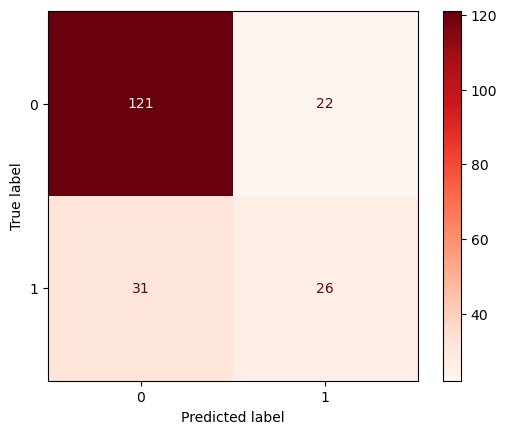

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       143
           1       0.54      0.46      0.50        57

    accuracy                           0.73       200
   macro avg       0.67      0.65      0.66       200
weighted avg       0.72      0.73      0.73       200

Accuracy: 0.735


In [6]:
### Code - kNN classifier

# Setup a k-NN model with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Fitting the k-NN model using training set
knn_model.fit(scaled_features_train, labels_train) # to fit the KNN

# Predicting the labels for testing set
predicted_labels = knn_model.predict(scaled_features_test)

# ---- Confusion matrix
# Confusion matrix takes parameters (<actual labels>, <predicted labels>)
conf_matrix = metrics.confusion_matrix(labels_test, predicted_labels)

# You can simply print it
print(conf_matrix) 

# or you can get a little more visualized matrix with the sklearn.metrics.plot_confusion_matrix()
# NOTE, this takes test features and test labels as parameters
metrics.plot_confusion_matrix(knn_model, scaled_features_test, labels_test, cmap='Reds')
plt.show()

# ---- Classification report
print(metrics.classification_report(labels_test, predicted_labels))

# ---- For accuracy only, we can use sklearn.metrics.accuracy_score()
knn_accuracy = metrics.accuracy_score(labels_test, predicted_labels)
print('Accuracy:', knn_accuracy)

<font color = green><b><i> ----- Example answer -----</b></i></font>

<font color = green>From the confusion matrix above, we can see that the k-NN model was quite succesful at classifying the healthy ones (label 0): 121 healthy were correctly predicted being healthy, and 22 actual healthy were predicted incorrectly unhealthy/sick. On the other hand, the k-NN model wasn't able to classify the sick ones really succesfully: Only 26 sick ones were correctly predicted being sick, and total of 31 sick ones were predicted incorrectly being healthy. So mostly when the model tried to predict the sick individuals, they were falsely predicted. This may be because the healthy individuals were quite well represented in the training data, but there were significantly fewer sick people. </font>

<font color = green>The total accuracy for the k-NN model is <b>0.735</b>. It's quite ok, but not really an excellent one. As stated, the k-NN model has troubles with the minority class.</font>


In [7]:
### Code - 1000 different train-test-splits

# Setup a k-NN model
knn_rep_model = KNeighborsClassifier(n_neighbors=3)

# Setup a StandardScaler
scaler = StandardScaler()

# List to store the total accuracies 
accuracy_results = []

# Only total accuracies were asked but I'll store 
# accuracies for both labels too for curiousity
acc_healthy = [] # For healthy individuals
acc_sick = [] # For sick indiviudals

# Number of iterations
n_iter = range(1000)

# Iterating over 1000 different data splits
for i in n_iter:
    
    # Dividing the data into training and test set
    # we want 1000 different splits -> no random_state is used here
    features_train_tmp, features_test_tmp, labels_train_tmp, labels_test_tmp = train_test_split(features,
                                                                                                labels,
                                                                                                test_size=0.2,
                                                                                                stratify=labels)
  
    # --- Scaling
    # Fit a StandardScaler and scale the training features
    scaled_features_train_tmp = features_train_tmp.copy()
    scaled_features_train_tmp.loc[:, numeric_features] = scaler.fit_transform(scaled_features_train_tmp.loc[:, numeric_features])
    
    # USE THE ALREADY FITTED STANDARDSCALER HERE: 
    # transform the testing features
    scaled_test_features_tmp = features_test_tmp.copy()
    scaled_test_features_tmp.loc[:, numeric_features] = scaler.transform(scaled_test_features_tmp.loc[:, numeric_features])

    # --- Fitting a model and making predictions
    # Training model
    knn_rep_model.fit(scaled_features_train_tmp, labels_train_tmp)
    
    # Predicting classes
    predicted_labels_tmp = knn_rep_model.predict(scaled_test_features_tmp)
   
    # --- Performance metrics
    # Calculating the total accuracy of the model
    accuracy_tmp = metrics.accuracy_score(labels_test_tmp, predicted_labels_tmp)
    
    # Adding it to the result list
    accuracy_results.append(accuracy_tmp)

    # Calculating the normalized confusion matrix for class accuracies
    conf_matrix = metrics.confusion_matrix(labels_test_tmp, predicted_labels_tmp, normalize='true')
    
    # Adding accuracies to the list of the results of each class
    acc_healthy.append(conf_matrix.diagonal()[0])
    acc_sick.append(conf_matrix.diagonal()[1])

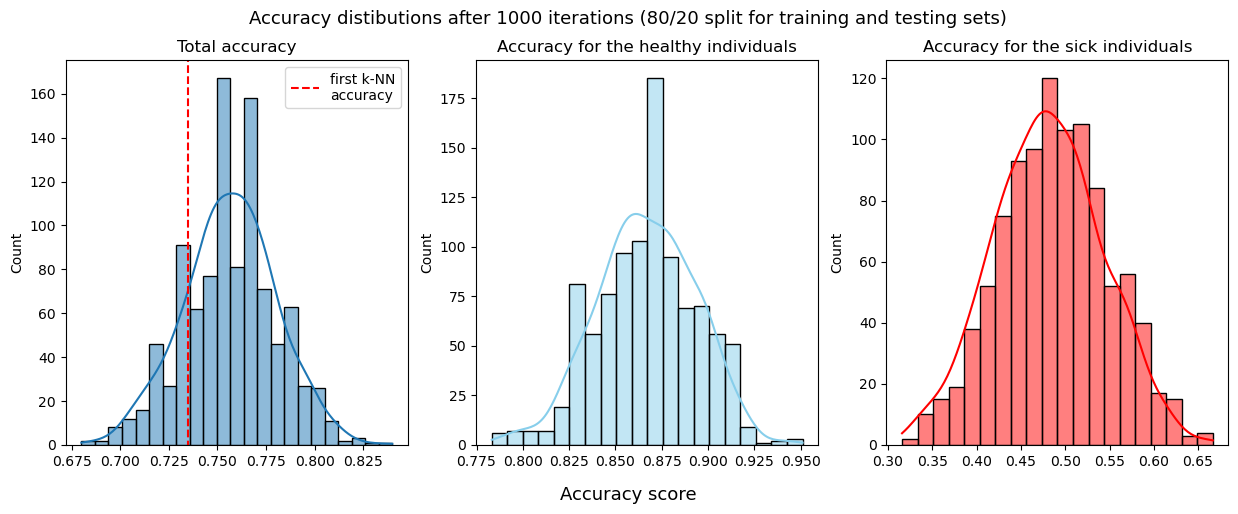

The mode for the total accuracies: 0.755
The mode for the healthy accuracies: 0.867
The mode for the sick accuracies: 0.474


In [8]:
# It's always nicer to have a separate chunk e.g. for visualization.
# Then you don't always need to run the whole loop when wanting to just, like, plot or print out somthing

# Subplotting accuracies - total accuracy in one and class accuracies into another plots
fig, ax = plt.subplots(1,3, figsize=(15,5)) # plt.subplot(<num of rows>, <num of cols>, <figuresize>)
fig.suptitle('Accuracy distibutions after 1000 iterations (80/20 split for training and testing sets)', size=13) # main title

# Total accuracy histogram
sns.histplot(accuracy_results, kde=True, ax=ax[0])

# Add the accuracy of the trained k-NN model in the total accuracy histogram
ax[0].axvline(knn_accuracy, ymin=140, ymax=0, linestyle='--', color='r', label='first k-NN\naccuracy') # for vertical line

# Accuracies per label
sns.histplot(acc_healthy, color='skyblue', label='Cardio=0', kde=True, ax=ax[1])
sns.histplot(acc_sick, color='red', label='Cardio=1', kde=True, ax=ax[2])

# Some titling and labeling
ax[0].set_title('Total accuracy')
ax[1].set_title('Accuracy for the healthy individuals')
ax[2].set_title('Accuracy for the sick individuals')
fig.text(0.5, 0, 'Accuracy score', ha='center', size=13) # shared x label

ax[0].legend()
plt.show()

print('The mode for ' + color.UNDERLINE + color.RED + 'the total accuracies:' + color.END, 
      round(np.median(accuracy_results), 3))
print('The mode for ' + color.UNDERLINE + color.RED + 'the healthy accuracies:' + color.END, 
      round(np.median(acc_healthy), 3))
print('The mode for ' + color.UNDERLINE + color.RED + 'the sick accuracies:' + color.END, 
      round(np.median(acc_sick), 3))

<font color = green><b><i> ----- Example answer -----</b></i></font>

<font color = green>After 1000 splits the accuracies (total and one for each class) converged close to normal distribution. The mode (the peak) of the total accuracies is <b>0.76</b> which is slightly better than the one gotten from the first k-NN model. Thus, we could have been a little unlucky when splitting the data for the first time.</font>

<font color = green>The mode accuracy for the healthy individuals is much larger than for the sick ones (<b>0.87</b> > <b>0.47</b>). We already noticed that the k-NN model was more successful in classifying the healthy ones, which can be also seen from the results above. The k-NN model is basically tossing a coin (and doing it quite poorly) when classifying the sick ones.

------

One really common evaluation metric is <font color = darkorchid><b>the area under the receiver operating characteristic (AUROC or AUC-ROC)</b></font>.

***Exercise 1 E)*** 

Explain what information you can learn about the one k-NN model you trained by using AUROC. Also, evaluate the performance by computing  the metric and plotting the related curve. Draw also the line for random guesses.

- How would you interpret the results?

<font color = teal><b><i> ----- Assistant's note -----</i></b></font>

<font color = teal>A great many of you used used the predicted labels instead of <b>the probability estimates of the predicted labels</b> when plotting a ROC curve.
    
<font color = teal>And some of you plotted one for both classes: There's no need as this is a binary classification task. As TPR can be seen as "the hit rate" and FPR as "the false alarm rate", the binary outcomes are either correct predictions (true positive) or not (false positive).</font> 

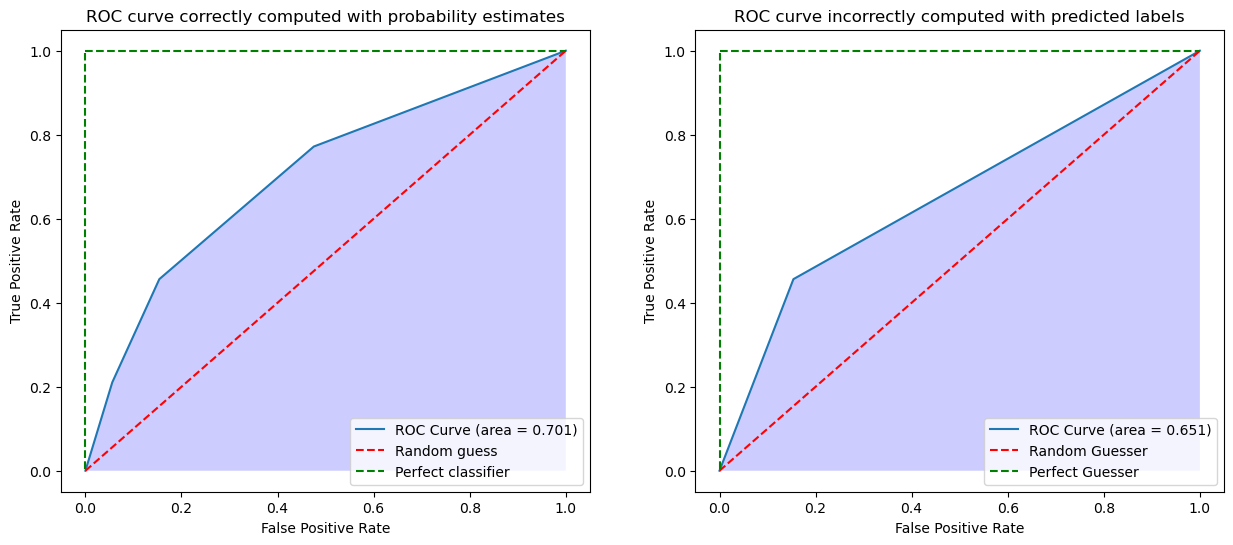

In [9]:
### Code - AUROC and ROC Curves

# Subplotting correct and incorrect ROC curve
fig, ax = plt.subplots(1,2, figsize=(15,6))

# ---- PLOTTING THE ROC CURVE

# GETTING THE PROBABILIY ESTIMATES, not predicted labels
# sklearn.neighbors.KNeighborClassifier.predict_proba returns the class probabilities 
pred_probabilities = knn_model.predict_proba(scaled_features_test)

# Keep only probabilities for the positive outcomes
pred_probabilities = pred_probabilities[:, 1]

# Number of classes (in binary, we know that there are two classes but if brute not wanted)
n_classes = len(labels.unique())

# Compute fpr, tpr and auroc using the probability estimates!!
# sklearn.mmetrics.roc_curve:
#     y_score :: ndarray of shape (n_samples,)
#               Target scores, can either be probability estimates of the positive class, 
#               confidence values, or non-thresholded measure of decisions 
#               (as returned by “decision_function” on some classifiers).

fpr, tpr, _ = metrics.roc_curve(labels_test, pred_probabilities)
auroc = metrics.roc_auc_score(labels_test, pred_probabilities)

# Plotting with seaborn
sns.lineplot(x=fpr, y=tpr, label=f'ROC Curve (area = {auroc:.3f})', ax=ax[0]).set(
    title='ROC curve correctly computed with probability estimates', 
    xlabel='False Positive Rate', 
    ylabel='True Positive Rate')

# Let's get fansy and color the AUROC
ax[0].fill_between(fpr, tpr, facecolor='blue', alpha=0.2)
    
# Adding random guesser line
sns.lineplot(x=[0,1], y=[0,1], linestyle='--', color='r', label='Random guess', ax=ax[0])

# EXTRA: Adding perfect guesser line
sns.lineplot(x=[0,1], y=[1,1], linestyle='--', color='g', label='Perfect classifier', ax=ax[0]) # for horizontal line
ax[0].axvline(0, ymin=0.05, ymax=0.95, linestyle='--', color='g') # for vertical line

# ------- What happens when we draw a curve similartly to 
# ------- above but using predicted labels, 0s and 1s?

# Compute fpr, tpr and auroc using incorrectly predicted labels
fpr, tpr, _ = metrics.roc_curve(labels_test, predicted_labels)
auroc = metrics.roc_auc_score(labels_test, predicted_labels)

# Plotting with seaborn
sns.lineplot(x=fpr, y=tpr, label=f'ROC Curve (area = {auroc:.3f})', ax=ax[1]).set(
    title='ROC curve incorrectly computed with predicted labels', 
    xlabel='False Positive Rate', 
    ylabel='True Positive Rate')

# Let's get fansy and color the AUROC
ax[1].fill_between(fpr, tpr, facecolor='blue', alpha=0.2)
    
# Adding random guesser line
sns.lineplot(x=[0,1], y=[0,1], linestyle='--', color='r', label='Random Guesser', ax=ax[1])

# EXTRA: Adding perfect guesser line
sns.lineplot(x=[0,1], y=[1,1], linestyle='--', color='g', label='Perfect Guesser', ax=ax[1]) # for horizontal line
ax[1].axvline(0, ymin=0.05, ymax=0.95, linestyle='--', color='g') # for vertical line

plt.show()

<font color = green><b><i> ----- Example answer -----</b></i></font>

<font color = green>*Note that only the ROC curve plotted in the left side is used for the answer as it's the correct one.*

<font color = green>True positive rate (TPR) tells how well a model performs when predicting a positive class (in our case, a healthy individual) when the actual class is positive (healthy). False positive rates (FPR), on the other hand, tells how often a positive class is predicted but the actual class is negative. (Airola, 2022.) That is, when a model predicts a sick individual to be healthy. So, the ROC curve is simply based on this trade-off between the rates mentioned, and the AUROC is just the area under that curve. A perfect classifier (green line) has an AUROC score of one and random guessing (red line) yields an AUROC score of 0.5, which means that a model can't separate the classes from each other.
    
<font color = green>The AUROC of the one k-NN trained above is <b>0.70</b>, which means the predictions are better than just random guesses but not perfect ones. This could be interpret that the model has a 70% chance to be able to distinguish between the healthy and the sick. Regarding the curve, there are only a few points and the shape of the curve is not stepped. This is because the hyperparameter $k=3$ gives only small number of probability estimates, leading to small number of points in the ROC curve.
    
--------    

<font color = green><b>References</b>
    
<font color = green>Airola, A. (2022). <i>Data Analysis and Knowledge Discovery - Performance measures for classification and regression</i>. Lecture slides.

__________
## <font color = royalblue> 2. Classification accuracy using leave-one-out cross validation

Even thought the train-test split gives us an unbiased estimate of the performance, we only evaluate the model one time. Especially with very small data sets, a test set will be very small. How can we be sure that the evaluation is accurate with this small test set and not just a good (or bad) luck? And what if we'd like to compare two models and the other seems to be better -- how can we be sure that it's not just a coincidence?

Well, there's a great help available and it's called <font color = darkorchid><b>cross-validation</b></font>. This time, we'll take a look at <font color = darkorchid><i>leave-one-out cross-validation</i></font>.

***Exercise 2 A)***

Describe *in your own words*, how leave-one-out cross validation works? How does it actually differ from the basic train-test split?

<font color = green><b><i> ----- Example answer -----</b></i></font>

<font color = green>Leave-one-out cross validation (LOOCV) means basically that on each iteration, you take one sample, let it be $i$th sample, as your testing set, and all the other $n-1$ samples as training set. You train the model using the training data, and test it with that $i$th sample. But that's why LOOCV is quite computationally expensive and time-consuming, as it iterates over all the data so that we have $n$ different training and testing sets. (Airola, 2022.)

<font color = green>And that's the difference compared to the basic train-test split: With train-test split you use the testing set only once to estimate the performance of the model, but with LOOCV, you test the model with different parts of the data multiple times. 
 
---------    

<font color = green><b>References</b>
    
<font color = green>Airola, A. (2022). <i>Data Analysis and Knowledge Discovery - Cross validation</i>. Lecture slides.

---------------

***Exercise 2 B)***

Let's predict once again the **presence of cardiovascular disease** using all the other variables in the dataset as features. Now, use leave-one-out cross validation to estimate the model performance. Again, use a kNN classifier with $k=3$.

- What is the classification accuracy? Compare the result with the one you got in the previous task.

*tip: Sure this could be done manually, but `cross_val_score` is quite a handy function too.*

<font color = teal><b><i> ----- Assistant's note -----</i></b></font>

<font color = teal>Some of you were quite confused that should you use the whole data here or not. Well, we can use the whole data here as it's about using cv to estimate the model performance, not model selection (which the next exercise is about). But there's nothing wrong in using the train-test split though, as always, you don't want to leak any information about test data to a model. Either way to go, you need to somehow justify your choices.</font> 

In [10]:
### Code - Leave-one-out cross validation
import time # to see how much time the LOOCV actually takes (with my PC)

# ----------- WHOLE DATA USED

# Standardize the features
scaler = StandardScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(features[numeric_features]), columns=numeric_features)
scaled_features = pd.concat([scaled_features, features[['sex', 'smoke', 'alco', 'active', 'cholesterol_at_risk', 'cholesterol_elevated', 'cholesterol_normal', 'gluc_at_risk', 'gluc_elevated', 'gluc_normal']]], axis=1)

print(f'len features {len(features)}, len st_features {len(scaled_features)}')
print(f'col len features {len(features.columns)}, col len st_features {len(scaled_features.columns)}')
display(scaled_features.head())

# Init a k-NN
knn_cv = KNeighborsClassifier(n_neighbors=3)

# Init a leave-one-out cross validator (LOOCV)
loo_cv = LeaveOneOut()

# ----------- with cross_vaL_score function
print(color.UNDERLINE + color.RED + 'Using the cross_val_score function' + color.END)

# LOOV scores with cross_val_score()
loo_scores = cross_val_score(knn_cv, scaled_features, labels, scoring='accuracy', cv=loo_cv)

print(f'Total of {len(loo_scores)} accuracy scores computed')

# Accuracy - cross_val_score returns array of scores of the esimator
# for __each run of the cross validation__ -> let's take a mean
print(f'Accuracy: {np.mean(loo_scores)}')
print()

# ----------- manually, for standardized data
print(color.UNDERLINE + color.RED + 'Using a for-loop for already standardized data'+ color.END)

# If we're doing this manually, we need to store the accuracies somehow
accuracies = []
knn_cv = KNeighborsClassifier(n_neighbors=3)

# Iterate over the data using .split(data)
# .split(X, y=None, groups=None) :: generates indices to split data into training and test set
for train_i, test_i in loo_cv.split(scaled_features): #train_i has the all but one datapoint
  
    # -- Dividing data into training and test sets
    features_train_tmp, features_test_tmp = scaled_features.iloc[train_i, :].copy(), scaled_features.iloc[test_i, :].copy()

    # We have all the labels in the variable labels
    labels_train_tmp, labels_test_tmp = labels[train_i], labels[test_i]

    # -- Fit the model
    knn_cv.fit(features_train_tmp, labels_train_tmp)
    
    # -- Make predictions
    pred_tmp = knn_cv.predict(features_test_tmp)
    
    # -- Compute accuracy
    accuracy_tmp = metrics.accuracy_score(pred_tmp, labels_test_tmp)
    accuracies.append(accuracy_tmp)
    
print(f'Total of {len(accuracies)} accuracies computed')
print(f'Accuracy: {np.mean(accuracies)}')
print()

# ----------- manually, first split and then standardize
print(color.UNDERLINE + color.RED + 'Using a for-loop but scale the data inside it' + color.END)

accuracies = []
knn_cv = KNeighborsClassifier(n_neighbors=3)

# Iterate over the data using .split(data)
# .split(X, y=None, groups=None) :: generates indices to split data into training and test set
for train_i, test_i in loo_cv.split(features): #train_i has the all but one datapoint
  
    # -- Dividing data into training and test sets
    features_train_tmp, features_test_tmp = features.iloc[train_i, :].copy(), features.iloc[test_i, :].copy()

    # We have all the labels in the variable labels
    labels_train_tmp, labels_test_tmp = labels[train_i], labels[test_i]
    
     # --- STANDARDIZE
    scaled_features_train_tmp, scaled_features_test_tmp = features_train_tmp.copy(), features_test_tmp.copy()
    scaled_features_train_tmp.loc[:, numeric_features] = scaler.fit_transform(scaled_features_train_tmp.loc[:, numeric_features])
    scaled_features_test_tmp.loc[:, numeric_features] = scaler.transform(scaled_features_test_tmp.loc[:, numeric_features])

    # -- Fit the model
    knn_cv.fit(scaled_features_train_tmp, labels_train_tmp)
    
    # -- Make predictions
    pred_tmp = knn_cv.predict(scaled_features_test_tmp)
    
    # -- Compute accuracy
    accuracy_tmp = metrics.accuracy_score(pred_tmp, labels_test_tmp)
    accuracies.append(accuracy_tmp)
    
print(f'Total of {len(accuracies)} accuracies computed')
print(f'Accuracy: {np.mean(accuracies)}')

len features 1000, len st_features 1000
col len features 15, col len st_features 15


,age,weight,height,ap_hi,ap_lo,sex,smoke,alco,active,cholesterol_at_risk,cholesterol_elevated,cholesterol_normal,gluc_at_risk,gluc_elevated,gluc_normal
0,1.422412,0.132087,-0.304682,-0.270611,-0.043859,0,0,0,1,0,0,1,0,0,1
1,-0.014353,0.482264,-0.046368,1.034480,1.052609,0,0,0,1,0,0,1,0,0,1
2,1.612151,0.202122,-1.208785,0.381935,-0.043859,0,0,0,1,0,0,1,0,1,0
3,1.376937,-0.568268,0.599420,-0.270611,-0.043859,1,0,0,1,0,0,1,0,0,1
4,1.031565,-0.428197,0.857735,2.339572,2.149076,1,0,0,0,0,0,1,0,0,1


Using the cross_val_score function
Total of 1000 accuracy scores computed
Accuracy: 0.76

Using a for-loop for already standardized data
Total of 1000 accuracies computed
Accuracy: 0.76

Using a for-loop but scale the data inside it
Total of 1000 accuracies computed
Accuracy: 0.76


<font color = green><b><i> ----- Example answer -----</b></i></font>

<font color = green>I did this exercise using the whole data to see in general, how well a k-NN would perform with the given task, predicting presence of a cardio disease.

<font color = green>Despite which method we choose to perform LOOCV (well, they are the same thing so that's why they end up with the same results), the accuracy score is <b>0.76</b>. It's <i>only slightly better</i> compared to the k-NN model with one single train-test split (<b>0.76 > 0.735</b>). On the other hand, cross validation is not a method to improve accuracy, but for hyperparameter tuning (next exercise) and to test how good the chosen algorithm is for the given problem. As LOOCV doesn't seem to really improve the overall accuracy, maybe the k-NN just isn't the best algorithm in predicting presence of the cardio diseases in the given data set.

____________
## <font color = forestgreen> 3. Model selection with leave-one-out cross validation

So far, we've trained one model at a time and I've given the value of k for you. Accuracy is what it is (no spoilers here), but could we still do a little better? Let's try that by <font color = darkorchid><b>hyperparameter tuning</b></font>.

This time, we're going to train multiple models, let's say 30, and choose the best K-Nearest Neighbors model among the others. Almost all models have some parameters that need to be chosen. As does the k-NN, I just happened to choose the k value of 3 for you. Note, k-NN has many other hyperparameters too, but for the sake of simplicity, this time we'll focus only on the nearest neighbors. 

Now, you're supposed to find that *optimal value* for k.

***Exercise 3***

Repeat the model performance estimation with values $k=1...30$ using again leave-one-out cross validation.

- Which value of k produces the best classification accuracy?
- If the number of k is still increased, what is the limit that the classification accuracy approaches? Why? 
- Can you say something about the performance of this selected model with new, unseen data? Explain, how could you estimate the performance of this selected model.

*tip: `GridSearchCV` is a good class for this but will you get the other but the best k value out of it?*

<font color = teal><b><i> ----- Assistant's note -----</i></b></font>

<font color = teal>Here, yes, you can use the train-test split as it's about model selection so you would like to have an unbiased accuracy estimate to be reported. However, the whole data can also be used, as maybe we just wanted to only report the accuracies for the different k values.

<font color = teal>If we'd like to be really careful with the exercise, <b>nested cross validation</b> could be used. With LOOCV, it would take ages to be completed so I'll show you a K-Fold implementation of it. K-Fold has the same idea behind is as LOOCV, but it just take $k$ instances as a testing set, not only the $i$th one. To be more spesific, I'll use 10-fold cross validation for the nested cross validation.
    
--------

<font color = green><i>There's nothing wrong with playing around the code and markdown blocks, so let's start with a markdown one.</i>

<font color = green><b><i> ----- Example answer -----</b></i></font>

<font color = green> I'll be trying different approaches with this one: using the whole data and also only training set. As noticed from the previous exercise, it didn't quite matter when the data was scaled, so for the sake of simplicity, I'm using the already standardized features in the variable `scaled_features`. I'm also showing two different ways to find that optimal k value: using the `GridSearchCV` class, and also iterating over different k values in a for-loop and using the already used `cross_val_score` function.

In [11]:
### Code - Select best model

# ----------- GRIDSEARCHCV ---------------
# ----------- WHOLE DATA
# Define a k-NN
# no n_neighbors value set as we're trying to find the optimal one
knn = KNeighborsClassifier()

# Store the different k values to a dictionary to be given for GridSearch 
n_dict = {'n_neighbors': range(1, 31)}

# Setup a GridSearchCV with given k values and LOOCV; scoring based on accuracy
grid_search = GridSearchCV(knn, n_dict, cv=loo_cv, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to find the best k-NN model
best_model_whole = grid_search.fit(scaled_features, labels)

print(color.UNDERLINE + color.RED + 'GridSearchCV with whole data' + color.END)
print('The optimal k value:', best_model_whole.best_params_['n_neighbors'])
print(f'The best CV accuracy: {best_model_whole.best_score_}')

print('-'*50)
# ----------- TRAINING SET (for comparison)
# Define a k-NN
# no n_neighbors value set as we're trying to find the optimal one
knn = KNeighborsClassifier()

# Store the different k values to a dictionary to be given for GridSearch 
n_dict = {'n_neighbors': range(1, 31)}

# Setup a GridSearchCV with given k values and LOOCV; scoring based on accuracy
grid_search = GridSearchCV(knn, n_dict, cv=loo_cv, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to find the best k-NN model
best_model_train = grid_search.fit(scaled_features_train, labels_train)

print(color.UNDERLINE + color.RED + 'GridSearchCV with training set' + color.END)
print('The optimal k value:', best_model_train.best_params_['n_neighbors'])
print(f'The best CV accuracy: {best_model_train.best_score_}')

print('-'*50)
# ----------- CROSS_VAL_SCORE -----------
# ----------- WHOLE DATA
k_accuracies_whole = []
for k in n_dict['n_neighbors']:
    knn = KNeighborsClassifier(n_neighbors = k)
    cv_scores = cross_val_score(knn, scaled_features, labels, scoring='accuracy', cv=loo_cv)
    k_accuracies_whole.append(cv_scores.mean())

print(color.UNDERLINE + color.RED + 'cross_val_score with whole data' + color.END)

# Note that as we find the index of maximum to get the optimal k
# you gotta add +1 to it as the indexing starts from 0
print(f'The optimal k value: {k_accuracies_whole.index(max(k_accuracies_whole))+1}')
print(f'The best CV accuracy: {max(k_accuracies_whole)}')   

print('-'*50)
# ----------- TRAINING SET (for comparison)
k_accuracies_train = []
for k in n_dict['n_neighbors']:
    knn = KNeighborsClassifier(n_neighbors = k)
    cv_scores = cross_val_score(knn, scaled_features_train, labels_train, scoring='accuracy', cv=loo_cv)
    k_accuracies_train.append(cv_scores.mean())

print(color.UNDERLINE + color.RED + 'cross_val_score with training set' + color.END)
# Note that as we find the index of maximum to get the optimal k
# you gotta add +1 to it as the indexing starts from 0
print(f'The optimal k value: {k_accuracies_train.index(max(k_accuracies_train))+1}')
print(f'The best CV accuracy: {max(k_accuracies_train)}')      

GridSearchCV with whole data
The optimal k value: 8
The best CV accuracy: 0.78
--------------------------------------------------
GridSearchCV with training set
The optimal k value: 27
The best CV accuracy: 0.78125
--------------------------------------------------
cross_val_score with whole data
The optimal k value: 8
The best CV accuracy: 0.78
--------------------------------------------------
cross_val_score with training set
The optimal k value: 27
The best CV accuracy: 0.78125


Unbiased accuracy estimate with the testing set = 0.28


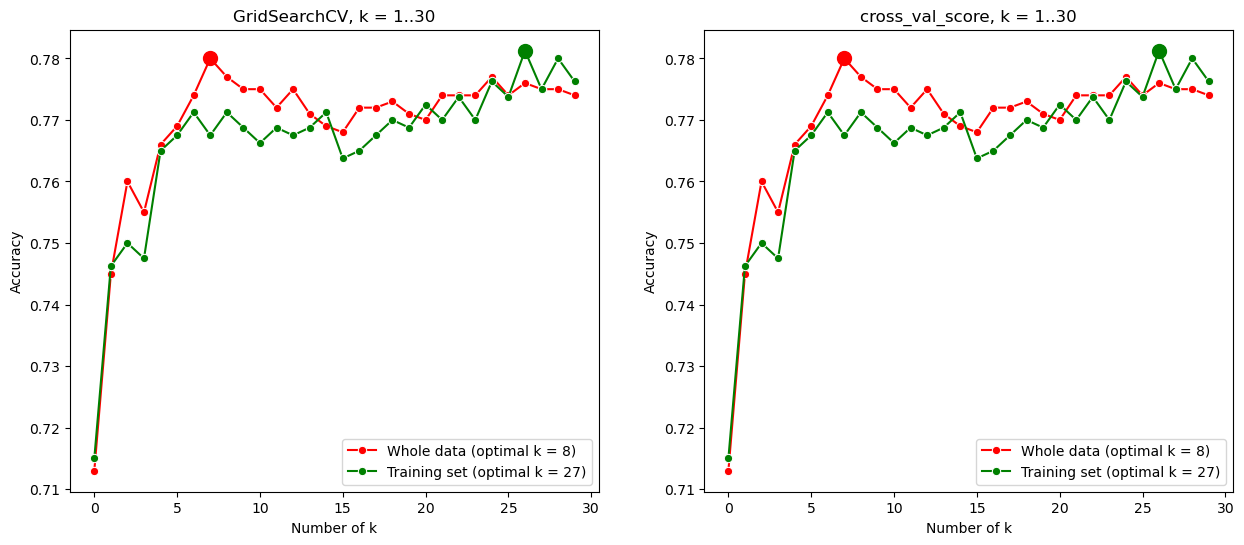

In [12]:
# As "a picture is worth a thousand words" et cetera, let's do some plotting
# Let's subplot the acciracies from both 
fig, ax = plt.subplots(1,2, figsize=(15,6))

# Be REALLY CAREFUL with indexing here!

# ----- First, GridSearchCV
# Whole data
sns.lineplot(data=best_model_whole.cv_results_['mean_test_score'],
             marker='o',
             color='red',
             label='Whole data (optimal k = {})'.format(best_model_whole.best_params_['n_neighbors']),
             ax = ax[0]).set(
    title = 'GridSearchCV, k = 1..30', 
    xlabel='Number of k', 
    ylabel='Accuracy')

# Highlight the best k point
ax[0].plot(best_model_whole.best_params_['n_neighbors']-1, best_model_whole.best_score_, 'or', markersize=10)

# Training set
sns.lineplot(data=best_model_train.cv_results_['mean_test_score'],
             marker='o',
             color='green',
             label='Training set (optimal k = {})'.format(best_model_train.best_params_['n_neighbors']),
             ax = ax[0])

# Highlight the best k point
ax[0].plot(best_model_train.best_params_['n_neighbors']-1, best_model_train.best_score_, 'og', markersize=10)
# ----- Then, cross_val_score

# Whole data
sns.lineplot(data=k_accuracies_whole,
             marker='o',
             color='red',
             label='Whole data (optimal k = {})'.format(k_accuracies_whole.index(max(k_accuracies_whole))+1),
             ax = ax[1]).set(
    title = 'cross_val_score, k = 1..30', 
    xlabel='Number of k', 
    ylabel='Accuracy')

# Highlight the best k point
ax[1].plot(k_accuracies_whole.index(max(k_accuracies_whole)), max(k_accuracies_whole), 'or', markersize=10)

# Training set
sns.lineplot(data=k_accuracies_train,
             marker='o',
             color='green',
             label='Training set (optimal k = {})'.format(k_accuracies_train.index(max(k_accuracies_train))+1),
             ax = ax[1])

# Highlight the best k point
ax[1].plot(k_accuracies_train.index(max(k_accuracies_train)), max(k_accuracies_train), 'og', markersize=10);

print('Unbiased accuracy estimate with the testing set =', metrics.accuracy_score(labels_test, best_model_train.predict(features_test)))

<font color = green>Well, the two methods (`GridSearchCV` and `cross_val_score`) gave exactly the same results as they are doing the really same thing. The optimal k values are from the opposite ends of the k value range, even though the accuracies are basically the same (the largest dots in the plots). So, when finding the optimal k with the whole data set, we get a smaller optimal k value. Note also that the difference between the accuracies when k=27 is smaller than between the accuracies when k=8. If we'd choose the lower k, the k-NN model learned to predict more locally while when choosing the larger k, the k-NN model learned to predict more globally (Airola, 2022).
    
<font color = green>If we were really careful, we'd choose <b>the k value of 27</b>, as there's the train-test split used.  When testing the model with the chosen k with the separate testing set, the accuracy score is now <b>0.775</b> (the accuracy for the very first k-NN model with k=3 was 0.735). With large k values, the accuracy approaches the proportion of class label 0/healthy in the dataset. As the k value increases, the majority vote is based on the class labels of increasing number of neighbors. Eventually the number of these k neighbors is so large that the prediction is always the majority class label in the dataset. Let's visualize this next.

GridSearchCV with training set
The optimal k value: 400
The best CV accuracy: 0.7125

Unbiased accuracy estimate with the testing set = 0.715


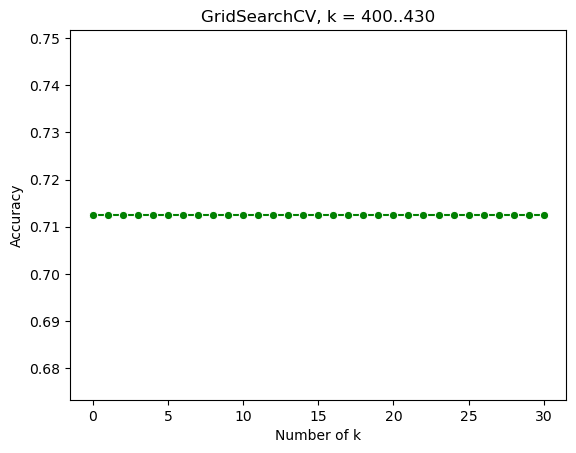

In [13]:
# ----- Let's try really large k values and see what happens to the final accuracy
# Define a k-NN
# no n_neighbors value set as we're trying to find the optimal one
knn_large = KNeighborsClassifier()

# Store the different k values to a dictionary to be given for GridSearch 
n_dict = {'n_neighbors': range(400, 431)}

# Setup a GridSearchCV with given k values and LOOCV; scoring based on accuracy
grid_search = GridSearchCV(knn_large, n_dict, cv=loo_cv, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to find the best k-NN model
# Doesn't really matter if we're using the whole data or the training set
# We'll end up underfitting our model anyways when the k value is large enough
best_model_large = grid_search.fit(scaled_features_train, labels_train)

print(color.UNDERLINE + color.RED + 'GridSearchCV with training set' + color.END)
print('The optimal k value:', best_model_large.best_params_['n_neighbors'])
print(f'The best CV accuracy: {best_model_large.best_score_}')
print()

# Plot the accuracies
sns.lineplot(data=best_model_large.cv_results_['mean_test_score'],
             marker='o',
             color='green').set(
    title = 'GridSearchCV, k = 400..430', 
    xlabel='Number of k', 
    ylabel='Accuracy');

# And test the best model
print('Unbiased accuracy estimate with the testing set =', metrics.accuracy_score(labels_test, best_model_large.predict(features_test)))

<font color = green>The normalized label balance in the training set was 0.7125, and in the testing set 0.715 (both computed in the exercise 1B), so we can say that we've really underfitted the k-NN model: The model isn't doing a good job with the training set and can't be generalized to predict with unseen data.
    
<font color = green>As done above, the predictive perfomance of the model can sure be evaluated using train-test-split with the following steps:

- <font color = green>With the training set, use cross validation to find the optimal k value.
    
- <font color = green>Fit the model using whole training sample with the optimal k found in the previous step.
    
- <font color = green>Obtain the estimate for prediction accuracy by predicting the labels in the testing set using the model fitted in the previous step.

<font color = green>In this approach as discussed earlier estimate for the prediction accuracy is sensitive to the random train-test-split. More robust option is to evaluate the predictive performance by using nested cross validation. The idea of the nested cross validation is that you perform - simply cross validation within cross validation, i.e., you set up an inner loop for model optimization and selection, and the outer one for evaluating its performance (Airola, 2022). And as an extra fun, I'm going to use the nested cross validation with 10-fold cross validation to see, if we'd do any better with it. I'll use the implementation from the Scikit-Learn documentation about nested cross validation in [here](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html).

In [14]:
# --------------- AAND THE EXTRA FUN: nested cross validation
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

# This is my final ultimate try to do this as "correctly" as possible, so
# I'm gonna use the pipeline here as we'd really like to prevent any kind of 
# data leakage. Above, I just boldly used the standardized dataset and didn't
# give a second thought for it. But now, as "preprocessing should be done solely based
# on information from training holds" (Airola, 2022), the pipeline is used to chain
# these transformations with the estimator.
# More about this found in here: https://scikit-learn.org/stable/common_pitfalls.html

# How many times to perform the nested cross validation
n_trials = 30

# The dictionary for GridSearchCV for the k-NN model
# using '__' to separate parameter names in the pipeline
n_dict = {"n_neighbors": range(1,31)}

# Let's store the trial accuracies
nested_accuracies = []
for n in range(n_trials):
    # ----- INNER 10-FOLD CROSS VALIDATION
    cv_inner = KFold(n_splits=10, shuffle=True)
    
    # And here we build the pipeline with the scaler and GridSearchCV
    optimizing_pipeline = make_pipeline(StandardScaler(),
                                        GridSearchCV(KNeighborsClassifier(), n_dict, scoring='accuracy', cv=cv_inner))

    # ----- OUTER 10-FOLD CROSS VALIDATION
    # (these could be different cross validators so I set these twice)
    cv_outer = KFold(n_splits=10, shuffle=True)
    
    # The nested cross validation happens here
    # we're using the non-standardized feature set here as the scaler is set in the pipeline
    # So first, we're using optimizing_pipeline which is used to optimize the k value by cross validation.
    # Then, the results are evaluated also using cross validation.
    # ! Note that here we give UNSTANDARDED features for cross_val_score as they are
    #   scaled using the pipeline.
    nested_scores = cross_val_score(optimizing_pipeline, features, labels, cv=cv_outer)
    
    print(f'[{n+1}/{n_trials}] the nested CV accuracy: {nested_scores.mean():.4f}')
    nested_accuracies.append(nested_scores.mean()) 

[1/30] the nested CV accuracy: 0.7580
[2/30] the nested CV accuracy: 0.7650
[3/30] the nested CV accuracy: 0.7730
[4/30] the nested CV accuracy: 0.7620
[5/30] the nested CV accuracy: 0.7660
[6/30] the nested CV accuracy: 0.7730
[7/30] the nested CV accuracy: 0.7720
[8/30] the nested CV accuracy: 0.7710
[9/30] the nested CV accuracy: 0.7610
[10/30] the nested CV accuracy: 0.7700
[11/30] the nested CV accuracy: 0.7670
[12/30] the nested CV accuracy: 0.7650
[13/30] the nested CV accuracy: 0.7670
[14/30] the nested CV accuracy: 0.7680
[15/30] the nested CV accuracy: 0.7610
[16/30] the nested CV accuracy: 0.7590
[17/30] the nested CV accuracy: 0.7700
[18/30] the nested CV accuracy: 0.7620
[19/30] the nested CV accuracy: 0.7640
[20/30] the nested CV accuracy: 0.7680
[21/30] the nested CV accuracy: 0.7650
[22/30] the nested CV accuracy: 0.7560
[23/30] the nested CV accuracy: 0.7770
[24/30] the nested CV accuracy: 0.7600
[25/30] the nested CV accuracy: 0.7750
[26/30] the nested CV accuracy: 0.

The maximum accuracy for the nested cross validation is 0.777


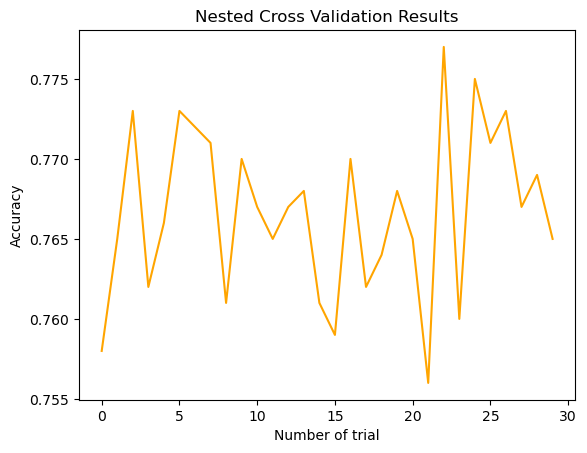

In [15]:
# Let's plot the results
sns.lineplot(data=nested_accuracies, color='orange').set(
    title = 'Nested Cross Validation Results', 
    xlabel='Number of trial', 
    ylabel='Accuracy');

print('The maximum accuracy for the nested cross validation is',
      color.BOLD + color.RED +
      str(round(max(nested_accuracies), 3))
      + color.END)

<font color = green>The maximum accuracy score for the nested cross validation is <b>0.777</b> which is only 0.002 better than the accuracy score computed previously (0.775). Sure, we need to note that the 10-fold cross validation was used to be able to execute the nested cross validation <i>before</i> the oceans freeze, so the accuracies aren't that well comparable. 
    
-------
    
<font color = green><b>References</b>
    
<font color = green>Airola, A. (2022). <i>Data Analysis and Knowledge Discovery - Cross validation</i>. Lecture slides.

________________
## <font color = red>  4. Testing with training data <font color = red> (this should *never* be done out of this exercise!) </font>

Oh, but what if we just used the ***whole data*** in training? Wouldn't we like to use as much data as possible to discover the underlying pattern in the data so why **not** to use the whole data?

*Never ever* do this out of this exercise. Why? Let's take a look.

***Exercise 4***

Repeat the previous task but use the whole data for training. Plot the resulting classification accuracy versus $k = 1...30$. Include the values from the previous task in the *same figure*.

- Comment your result and answer, why you should not test with training data?

<font color = teal><b><i> ----- Assistant's note -----</i></b></font>

<font color = teal>This question was really ambiguous and even misleading, as there's no need to "repeat the previous task", meaning, you don't need to use any cross validation or separate train and test sets in this. So, if your answer doesn't look like the one below, it doesn't really matter. 
    
<font color = teal>This has been taken into account in the grades, i.e. the exercise didn't have any effect on them. 

In [16]:
### Code - Train with whole data

# Basically, because it's about using the whole data in the training, you simply
# 1) iterate over the wanted k values
# 2) fit the model using the whole data (i.e. use all the features and all the labels so no need to
#    perform any train-test splits nor cross-validation)
# 3) make predictions using all the data again: it's a k-NN and as it only stores all the
#    training data in the memory, there's no difference if you make it predict from a sample
#    of data or all of it.

# List for accuracies
accuracies = []

# Iterating over k values
for k in range(1, 31):
    
    # Init a k-NN with a spesific k values
    knn = KNeighborsClassifier(n_neighbors = k)
    
    # Fit the model with all the standardized features and all the labels
    knn.fit(scaled_features, labels)
    
    # Make predictions based on all the features
    predictions = knn.predict(scaled_features)
    
    # Compute an accuracy score for the spesific k value and store in a list
    accuracies.append(metrics.accuracy_score(labels, predictions))

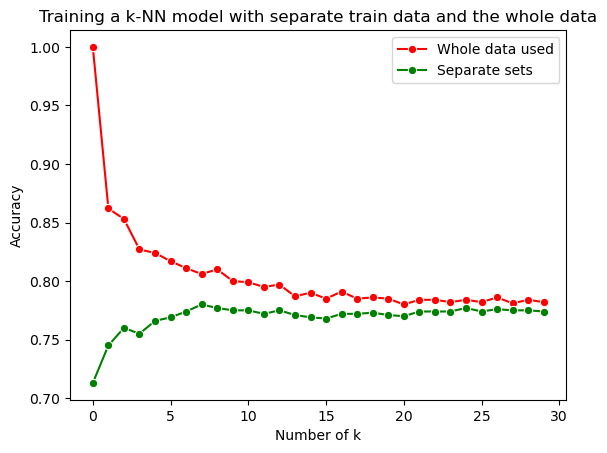

In [17]:
### Code - Plot results

# ----- First, the accuracies when training with all the data
sns.lineplot(data=accuracies, marker='o', color='red', label='Whole data used').set(
    title='Training a k-NN model with separate train data and the whole data',
    xlabel='Number of k',
    ylabel='Accuracy')

# ----- Then, the accuracies when having separate training data
# k_accuracies_train was computed in the previous exercise
sns.lineplot(data=k_accuracies_whole, marker='o', color='green', label='Separate sets');

<font color = green><b><i> ----- Example answer -----</b></i></font>

<font color = green>If the whole dataset is used to fit the model and also used to evaluate the predictive performance of the model, highly skewed results are obtained. The plot above highlights the problems of this approach:

- <font color = green>Predictive performance of the model is systematically overstated.
    
- <font color = green>If model selection is based on this approach, a model with k=1 would be chosen, leading to serious overfitting, unrealistic prediction accuracy (=1) and very poor performance with unseen data. When k=1, the data point is its own neighbor.

<font color = green>Results from the LOOCV are more sensible. Best predictive performance is obtained with a larger k and prediction accuracy is lower across all the k values. So in summary the model's predictive performance cannot be evaluated without observations that were not used to fit the model. Otherwise overfitted model and inflated accuracy estimate are obtained.

_____________________

## <font color = darkorange> 5. Comparison of ridge regression and kNN regression </font>

The previous exercises were about classification. Now, we are ready to see another kind of supervised learning - regression. We're going to use <font color = darkorchid><b>Ridge Regression</b></font> and <font color = darkorchid><b>K-Nearest Neighbors Regression</b></font>, and compare the performances of these models.

To make this exercise more intuitively, let's change the data to another somewhat famous dataset called *The Boston Housing Dataset*. The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts. Let's have a quick peek at the variables:

- **CRIM** - per capita crime rate by town
- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** - proportion of non-retail business acres per town.
- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX** - nitric oxides concentration (parts per 10 million)
- **RM** - average number of rooms per dwelling
- **AGE** - proportion of owner-occupied units built prior to 1940
- **DIS** - weighted distances to five Boston employment centres
- **RAD** - index of accessibility to radial highways
- **TAX** - full-value property-tax rate per \$10,000
- **PTRATIO** - pupil-teacher ratio by town
- **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT** - % lower status of the population
- **MEDV** - Median value of owner-occupied homes in \$1000's


No worries if the variables don't make a lot of sense. However, the object is to predict **the median house value**. So the target variable is now <font color = darkorchid><b>MEDV</b></font> and all the others are <font color = darkorchid><b>features</b></font>.

There's the code chunk for loading data provided again. <font color = red>Again, the data file should be located in the same directory as this notebook file!</font>

In [18]:
### Loading code provided
# ------------------------------------------------------
# The data file should be at the same location than the 
# exercise file to make sure the following lines work!
# Otherwise, fix the path.
# ------------------------------------------------------

# Data path
data_path = 'ex2_boston_housing_data.csv'

# Load the data 
boston_data = pd.read_csv(data_path, dtype='float')

-----------

With regression, we can examine **the relationship between two or more variables**. This relationship is represented by an *equation*, which itself represents how much y changes with any given change of x. So for example, we could use *age* as an independent variable to predict *height* (a dependent variable). 

We start by looking at the relationships between the variables in the given dataset.


***Exercise 5 A)***

Make scatter plots where you present each feature versus the target variable `MEDV`.

- What can you say about the relationships?

*tip: seaborn.pairplot is quite a handy function where you can set x_vars and y_vars to point out the variables you need*

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
MEDV,-0.547703,0.417941,-0.613454,0.078982,-0.55948,0.60327,-0.52591,0.404197,-0.485137,-0.579123,-0.475259,0.384986,-0.77036,1.0


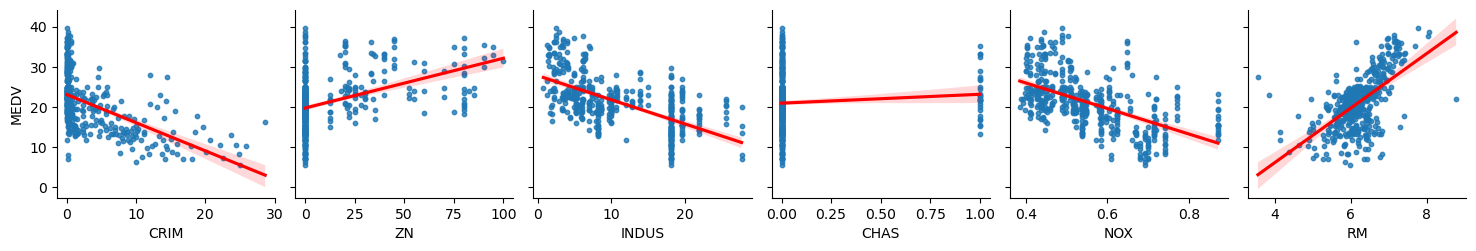

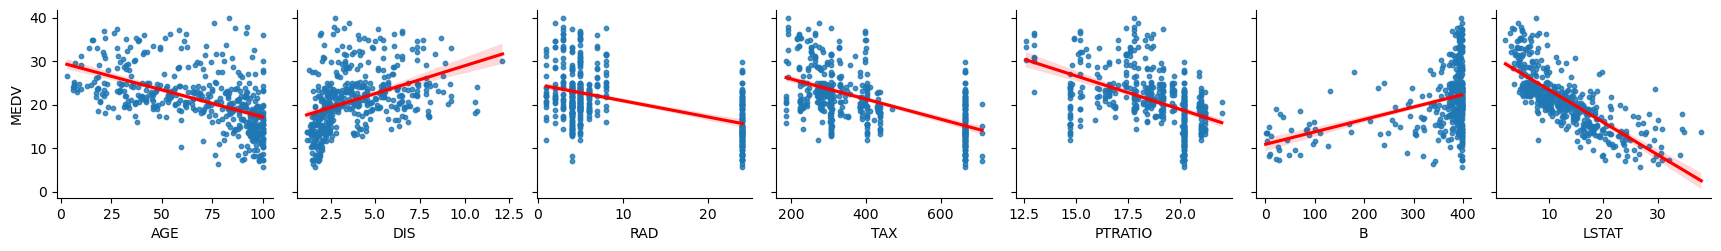

In [19]:
### Code - Scatter plots

feature_columns = boston_data.columns.drop('MEDV')

# Plot first 6 variables vs. MEDV
sns.pairplot(data=boston_data, 
             x_vars=feature_columns[0:6], 
             y_vars='MEDV',
             kind='reg',
             plot_kws={'line_kws':{'color':'red'},
                       'scatter_kws': {'s': 10}});

# Plot the rest variables vs. MEDV
sns.pairplot(data=boston_data, 
             x_vars=feature_columns[6:len(feature_columns)], 
             y_vars='MEDV',
             kind='reg',
             plot_kws={'line_kws':{'color':'red'},
                       'scatter_kws': {'s': 10}});

# Extra but helps with examing the relationships between the feature variables and the target one
display(boston_data.corr().loc[:, ['MEDV']].T)

<font color = green><b><i> ----- Example answer -----</b></i></font>

<font color = green>Based on the target column (`MEDV`) which is the median value, we can detect a couple of things like the following:

- <font color = green>`RM` is the feature with the highest correlation, making a lot of sense that the value of a house with more rooms will be higher.
- <font color = green>`LSTAT` is a feature that, even though its correlation is negative, might affect the price of houses as it decreases with a larger population of lower economic status.
- <font color = green>There are multiple variables that might contain erroneous data, like `ZN`, with many zeros. This could mean that the houses could be less than 25,000 sq ft and due to the nature of the variable (the smallest value) they could not be represented correctly.
- <font color = green>`CHAS` is a categorical variable, but the closeness of a house to the river might influence its value.
- <font color = green>`NOX` is a feature that refers to how polluted is a city, it might be an important feature to consider since cleaner cities might have more valuable houses.
- <font color = green>`DIS` is a feature that refers to how close is the house to employment centers, this might be a feature like `CHAS` since the closeness of a house might influence its value too.
- <font color = green>The other features might not be as important as the ones mentioned above, but they might still be important to consider.

------

We are about to compare two different regression models. We need to be sure that both are *the best models* among the other trained models. But to make sure that these selected models really are the best ones, we're going to use a combination of cross-validation and hyperparameter tuning right away. What's the other way to ensure that the chosen hyperparameters are appropriate for the given data?

For the k-Nearest neighbors, we have previously get familiar with the optimization of the k value. Let's continue with this value to find the *optimal k* for the k-nearest neighbors regression too. With ridge regression, we have this hyperparameter called $\lambda$ (read as 'lambda'). We'll use this parameter for model selection.


To compare the models, let's use a loss function called <font color = darkorchid><b>mean absolute error (MAE)</b></font>. 

<font color = teal><b><i> ----- Assistant's note -----</i></b></font>

<font color = teal>This whole exercise (exluding exploring the relationships and the last plotting subtask) is just repeating all the previously learned. So, the steps to succesfully complete this exercises are as follows:
    
- <font color = teal>(1B) Split the data into training and testing sets
- <font color = teal>(1C) Scale the data
- <font color = teal>(3) Find the optimal k and the optimal lambda for k-NN regression and ridge regression, respectively. Compare MAEs!
- <font color = teal>(1D) Fit the models with the optimal hyperparameters and plot the results
    
<font color = teal>And justify your doings at each of those steps. As I asked you to plot the predicted labels vs. the actual labels in 5D, the selected models should be tested with some data. Thus, splitting the data into training and testing sets is quite a good idea as you want to get that unbiased estimate of the performance of each model.



***Exercise 5 B)***

Do you need to prepare the data a little? Explain your decision.

In [20]:
### Code - Data preparation

# --- WHY TO PREPARE?
display(boston_data.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,2.859473,10.825482,11.178758,0.059957,0.554025,6.203176,68.283084,3.861389,9.400428,407.528908,18.581799,357.492741,13.047259,21.113490
std,5.204950,22.435436,6.810618,0.237662,0.117089,0.591121,28.062858,2.113944,8.657791,167.120323,2.061196,89.711000,6.872562,6.656016
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.980000,5.600000
25%,0.082100,0.000000,5.190000,0.000000,0.449000,5.879500,44.700000,2.122300,4.000000,281.000000,17.400000,375.955000,7.580000,16.800000
50%,0.228760,0.000000,9.690000,0.000000,0.538000,6.169000,76.700000,3.317500,5.000000,330.000000,19.100000,392.110000,11.980000,20.800000
75%,3.504645,12.500000,18.100000,0.000000,0.624000,6.539000,93.850000,5.266000,24.000000,666.000000,20.200000,396.900000,17.115000,24.350000
max,28.655800,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,39.800000


<font color = green><b><i> ----- Example answer -----</b></i></font>

<font color = green>It seems that variables have very different ranges compared to each other so it's always a good choice to standardize such data. As already stated, we don't want that any variable dominates the others. Like for example, the `CRIM` variable has values between approx. <b>(0.08, 28.66)</b>, but the `TAX` variable has values between approx. <b>(187, 711)</b>, so `TAX` would definitely dominate `CRIM`. Note also, that the `CHAS` variable seems to be a binary one: let's anyways scale it this time.
    
<font color = green>So, let's first split the data and then standardize the features of both sets. Of course we could use the pipeline implementation with `GridSearchCV` in the next exercise to be more certain that there's no information leaking to the training set in cross validation. But to keep this simple, and as we still have the "final test" ready for the models, let's standardize the features right away.

In [21]:
# Store all other variables but the target one (MEDV) as features
features = boston_data.drop(columns='MEDV')

# Our target variable
labels = boston_data['MEDV']

# NOTE THE ORDER: first split, and then scale!

# ---- TRAIN-TEST SPLIT (the exercise 1B) ----

features_train, features_test, labels_boston_train, labels_boston_test = train_test_split(features,
                                                                                          labels,
                                                                                          test_size=0.2,
                                                                                          random_state=2022)

print('The shapes of the ' + color.BOLD + color.GREEN + 'training' + color.END,
      f'features {features_train.shape}, and labels {labels_boston_train.shape}')
print('The shapes of the ' + color.BOLD + color.GREEN + 'testing' + color.END,
      f'features {features_test.shape}, and labels {labels_boston_test.shape}')

# ---- STANDARDIZATION (the exercise 1C) ----

# Setup the StandardScaler  
scaler = StandardScaler()

# Scaling the training features
scaled_boston_features_train = pd.DataFrame(scaler.fit_transform(features_train), columns=features.columns)

# Scaling the testing features
scaled_boston_features_test = pd.DataFrame(scaler.transform(features_test), columns=features.columns)

# Let's have a peak
display('Training features before scaling', features_train.head())
display('Training features after scaling', scaled_boston_features_train.head())

The shapes of the training features (373, 13), and labels (373,)
The shapes of the testing features (94, 13), and labels (94,)


'Training features before scaling'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
424,5.82115,0.0,18.10,0.0,0.7130,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29
116,0.15098,0.0,10.01,0.0,0.5470,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
466,0.04741,0.0,11.93,0.0,0.5730,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88
247,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
305,0.05023,35.0,6.06,0.0,0.4379,5.706,28.4,6.6407,1.0,304.0,16.9,394.02,12.43


'Training features after scaling'

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.635077,-0.490614,1.041209,-0.256348,1.350262,0.477389,0.797315,-0.511650,1.762209,1.621501,0.822481,0.395359,-0.369689
1,-0.510351,-0.490614,-0.140195,-0.256348,-0.042996,-0.380677,0.533814,-0.537340,-0.358506,0.202348,-0.336111,0.403109,-0.368235
2,-0.531273,-0.490614,0.140187,-0.256348,0.175225,-0.364981,0.468841,-0.652231,-0.947594,-0.761948,1.208678,0.429950,-0.719931
3,-0.480417,0.383829,-0.585595,-0.256348,-0.739625,-0.668443,-0.928073,0.259695,-0.711959,-1.065186,0.050087,0.337297,0.024153
4,-0.530703,1.039662,-0.717025,-0.256348,-0.958686,-0.930049,-1.422588,1.307983,-0.947594,-0.573940,-0.770583,0.397606,-0.058685


------

***Exercise 5 C)***

Then, train a ridge regression model  and a k-NN regression model. For hyperparameters, use $\lambda=2^{-10}...2^{10}$ and $k=1...30$. Once again, use leave-one-out cross validation.

- What are the total performances of each model and how they compare with each other? 
- What does the MAE tell you about the performances of your models and in general?

*note: In a `sklearn.linear_model.Ridge` class, lambda is called alpha so don't get confused*

In [22]:
### Code - Ridge regression and k-NN regression

# As done in the exercise 3, let's use GridSearchCV to find out
# the optimal hyperparameter values for k and lambda. This time,
# we'll use training set for that and afterwards train the selected
# (best) models using the testing set

loo_cv = LeaveOneOut()

# ------ k-NN regression -------

# Define a k-NN regression model
# no n_neighbors value set as we're trying to find the optimal one
knn_reg_model = KNeighborsRegressor()

# Store the different k values to a dictionary to be given for GridSearch 
k_dict = {'n_neighbors': range(1, 31)}

# Setup a GridSearchCV with given k values and LOOCV; scoring based on accuracy
grid_search = GridSearchCV(knn_reg_model, k_dict, cv=loo_cv, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the GridSearchCV to find the best k-NN model
best_knn_reg = grid_search.fit(scaled_boston_features_train, labels_boston_train)

print(color.UNDERLINE + color.RED + 'GridSearchCV with training set' + color.END)
print('The optimal k value:', best_knn_reg.best_params_['n_neighbors'])

# Take the absolute of MAE as it's computed as negative mean absolute error
print(f'The best MAE: {np.absolute(best_knn_reg.best_score_):.3f}')
print()

# ------ ridge regression -------

# Define a ridge regression model
# no alpha value set as we're trying to find the optimal one
ridge_model = Ridge()

# Store the different k values to a dictionary to be given for GridSearch 
alpha_dict = {'alpha': np.arange(2**(-10), 2**(10))}
n_alpha = len(alpha_dict['alpha'])

print(f'{n_alpha} lambdas to check when using np.arange() so may take a while...')

# Setup a GridSearchCV with given k values and LOOCV; scoring based on accuracy
grid_search = GridSearchCV(ridge_model, alpha_dict, cv=loo_cv, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the GridSearchCV to find the best k-NN model
best_ridge_reg = grid_search.fit(scaled_boston_features_train, labels_boston_train)

print(color.UNDERLINE + color.RED + 'GridSearchCV with training set' + color.END)
print('The optimal lambda:', best_ridge_reg.best_params_['alpha'])

# Take the absolute of MAE as it's computed as negative mean absolute error
print(f'The best MAE: {np.absolute(best_ridge_reg.best_score_):.3f}')

GridSearchCV with training set
The optimal k value: 3
The best MAE: 2.190

1024 lambdas to check when using np.arange() so may take a while...
GridSearchCV with training set
The optimal lambda: 3.0009765625
The best MAE: 2.482


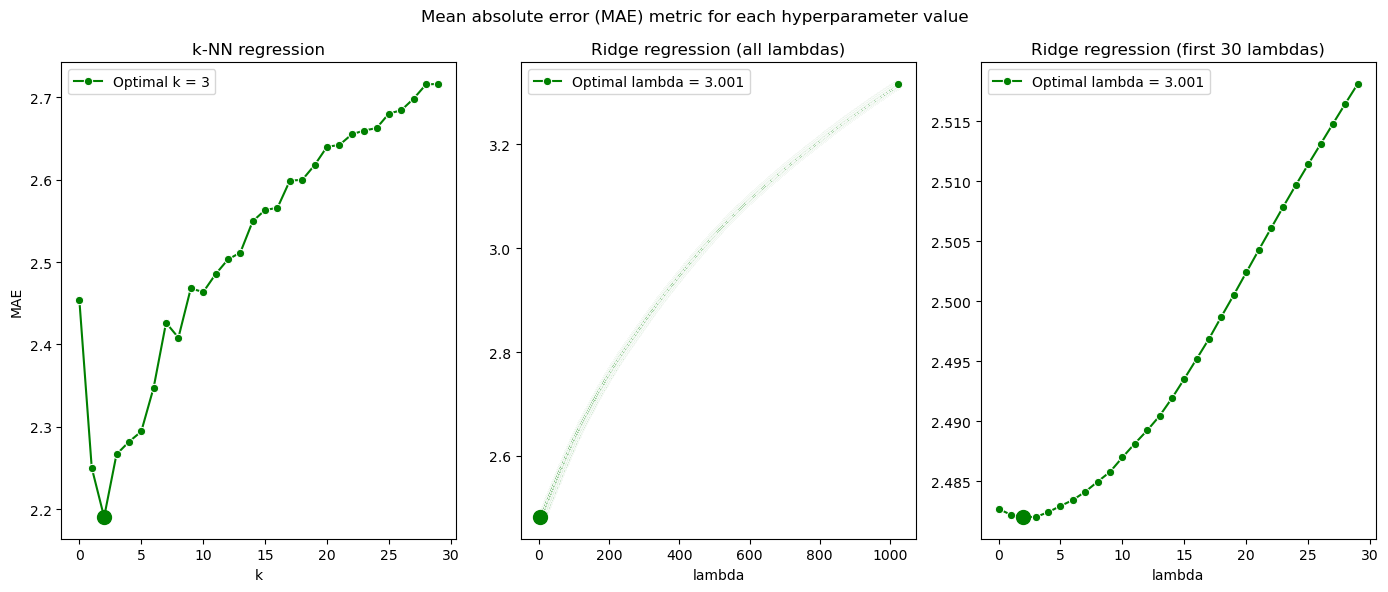

In [23]:
# And as always, there's nothing wrong in visualizating the scores obtained
# as it gives a lot more intuition about tha MAEs in general (at leasta for me)

fig, ax = plt.subplots(1,3, figsize=(14,6))

# To get more intuitive plots, I'm gonna take a lot of absolute values here
# so everything is wrapped with np.absolute()

# ------ k-NN regression -------
# Training set
sns.lineplot(data=np.absolute(best_knn_reg.cv_results_['mean_test_score']),
             marker='o',
             color='green',
             label='Optimal k = {}'.format(best_knn_reg.best_params_['n_neighbors']),
             ax = ax[0]).set(
                            title='k-NN regression',
                            xlabel='k', ylabel='MAE')

# Highlight the best k point
ax[0].plot(best_knn_reg.best_params_['n_neighbors']-1, np.absolute(best_knn_reg.best_score_), 'og', markersize=10)

# ------ ridge regression -------
# All lambdas 
sns.lineplot(data=np.absolute(best_ridge_reg.cv_results_['mean_test_score']),
             marker='o',
             color='green',
             label='Optimal lambda = {:.3f}'.format(best_ridge_reg.best_params_['alpha']),
             ax = ax[1]).set(
                            title='Ridge regression (all lambdas)',
                            xlabel='lambda')

# Only 30 first
sns.lineplot(data=np.absolute(best_ridge_reg.cv_results_['mean_test_score'][0:30]),
             marker='o',
             color='green',
             label='Optimal lambda = {:.3f}'.format(best_ridge_reg.best_params_['alpha']),
             ax = ax[2]).set(
                            title='Ridge regression (first 30 lambdas)',
                            xlabel='lambda')

# Highlight the best lambda
ax[1].plot(best_ridge_reg.best_params_['alpha']-1, np.absolute(best_ridge_reg.best_score_), 'og', markersize=10)
ax[2].plot(best_ridge_reg.best_params_['alpha']-1, np.absolute(best_ridge_reg.best_score_), 'og', markersize=10)

fig.suptitle('Mean absolute error (MAE) metric for each hyperparameter value')
fig.tight_layout()
plt.show()

<font color = green><b><i> ----- Example answer -----</b></i></font>

<font color = green><i>Note that the y-axis of each plot (the MAE scores) is converted from negative to positive by taking the absolute value of negative MAEs.</i>

<font color = green>The <b>optimal k value seems to be 3</b>, and funnily, the <b>optimal lambda seems also be really close to 3</b>. With both models, the MAE first drops with the first few values, and then it starts to raise quite a lot. The biggest dots shows the optimal hyperparameter values. The MAEs are quite close to each other, but the k-NN model seems to perform a little better based on the metric (<b>2.190 < 2.482</b>).However, for the scale of the error, that is another story, since the feature MDV is on thousands of dollars, we might be off by 2.19 thousands of dollars, which depending on the case might be a lot of money.
    
<font color = green>Why to use the negative MAE when searching the optimal hyperparameters? Some metrics (like MAE) are about the distance between the actual labels and the predicted labels which we want to <i>minimize</i>. As all the hyperparameter optimizers in scikit-learn are about <i>maximizing</i> the score, they return the negated value of the metric. (Scikit-learn Developres, 2022.) In our case, MAE tell us how far is the predicted house value from the true value. 
    
    
<font color = green>MAE as a loss function does not put too much weight on the outliers since it is on a linear scale. So, it might not adequately represent the large scale of the errors, and since we are using a scale of thousands of dollars, it might not be the best metric to use. We could use the Mean Squared Error (MSE) instead, which is a metric that is more sensitive to outliers and thus might be a better metric to use in this case.
    
-------------
    
<font color = green><b>References</b>
    
<font color = green>Scikit-learn Developers. (2007--2022) 3.3.1. The scoring parameter: defining model evaluation rules. Retrieved 28 Nov 2022, from https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

------

We can say something about the performance now. One way to do the visualization is to plot actual labels vs predicted labels. Let's do that.


***Exercise 5 D)***

Using the best models found in the previous exercise, plot the actual labels vs. predicted labels. 

- How did the selected models perform?
- In an ideal situation, where should the data points be located?

k-NN regression, MAE for testing set: 2.090
ridge regression, MAE for testing set: 2.680


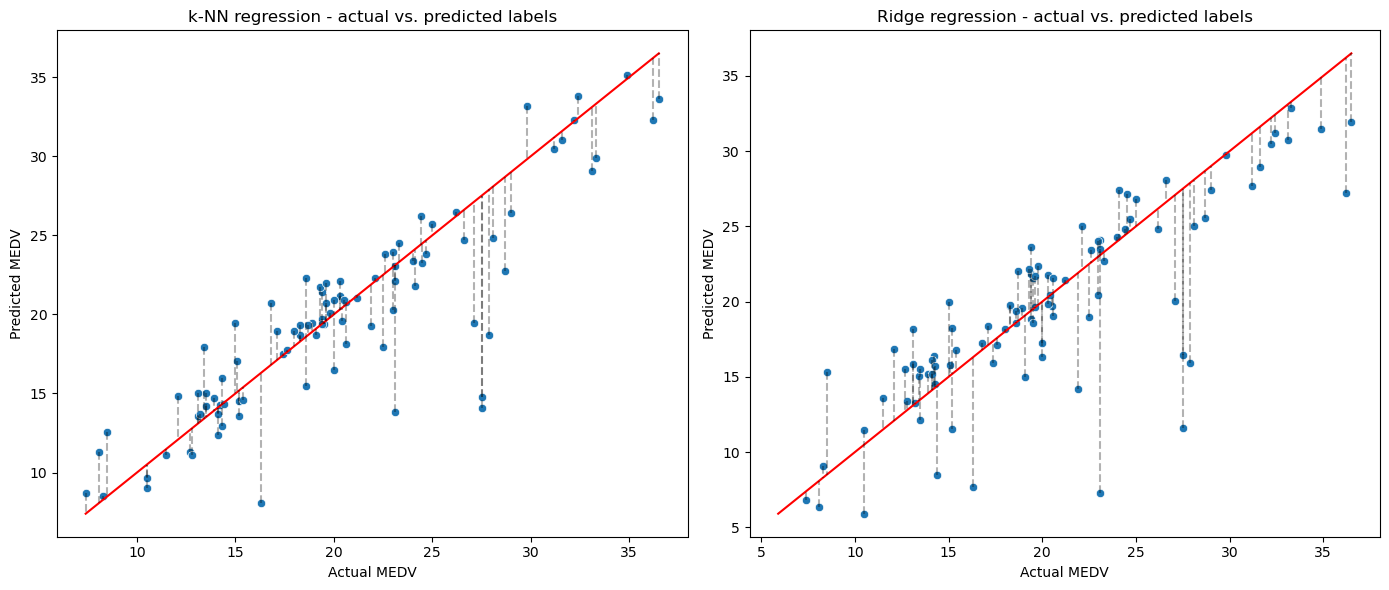

In [24]:
### Code - Plot actual vs predicted labels

fig, ax = plt.subplots(1,2, figsize=(14,6))

# ------ k-NN regression -------

# We find the best estimator (k-NN regression model) from 
# best_estimator_ parameters from GridSearchCV. This model
# is then already fitted!
best_knn = best_knn_reg.best_estimator_

# Make predictions with the best selected k-NN regression model
knn_preds = best_knn.predict(scaled_boston_features_test)

print(f'k-NN regression, MAE for testing set: {metrics.mean_absolute_error(labels_boston_test, knn_preds):.3f}')

sns.scatterplot(x =  labels_boston_test, y = knn_preds, ax=ax[0]).set(
    title='k-NN regression - actual vs. predicted labels', 
    xlabel='Actual MEDV', 
    ylabel='Predicted MEDV')

# Drawing the diagonal line
lower_bound = min(min(knn_preds), min(labels_boston_test))
higher_bound = max(max(knn_preds), max(labels_boston_test))
ax[0].plot([lower_bound, higher_bound], [lower_bound, higher_bound], 'r-')

# Add distance error
for i in range(len(labels_boston_test)):
    ax[0].plot([labels_boston_test.values[i],
                labels_boston_test.values[i]],
               [knn_preds[i],
                labels_boston_test.values[i]], 'k--', alpha=0.3)

# ------ ridge regression -------

# As we found the best k-NN regression model, similarly we find
# the best ridge regression model from GridSearchCV.best_estimator_
best_ridge = best_ridge_reg.best_estimator_

# Make predictions with the best selected ridge regression model
ridge_preds = best_ridge.predict(scaled_boston_features_test)

print(f'ridge regression, MAE for testing set: {metrics.mean_absolute_error(labels_boston_test, ridge_preds):.3f}')

sns.scatterplot(x = labels_boston_test , y = ridge_preds, ax=ax[1]).set(
    title='Ridge regression - actual vs. predicted labels', 
    xlabel='Actual MEDV', 
    ylabel='Predicted MEDV')

# Drawing the diagonal line
lower_bound = min(min(ridge_preds), min(labels_boston_test))
higher_bound = max(max(ridge_preds), max(labels_boston_test))
ax[1].plot([lower_bound, higher_bound], [lower_bound, higher_bound], 'r-')

# Add distance error
for i in range(len(labels_boston_test)):
    ax[1].plot([labels_boston_test.values[i],
                labels_boston_test.values[i]],
               [ridge_preds[i],
                labels_boston_test.values[i]], 'k--', alpha=0.3)

fig.tight_layout();

<font color = green><b><i> ----- Example answer -----</b></i></font>

<font color = green>Now, the predictions made with ridge regression seem tot be more far away from the diagonal line and emphasizing on the prediction side of the plot. The plots quite nicely confirms that the k-NN model is doing better job in predicting median house values. MAE for the k-NN model with the testing set is also smaller (<b>2.090 < 2.680</b>) which tells the same story. Quite easily we could eyeball the distance errors (dashed lines) from the plots and notice that there seems to be more greater errors on the lower diagonal half in the plot of ridge regression.
    
<font color = green>In the ideal situation the predicted labels would match perfectly with the actual labels so they could be on top of each other in the diagonal line (red line). <i>But</i> we might also face a model too good to be truth (overfitting) where the difference between the points is zero. 

________________
## <font color = dimgrey> BONUS: Feature selection - most useful features in predicting the disease </font>

You can stop here and get the "pass" grade! To get the "pass with honors" grade, you need to do the following exercise. This means you'll get one bonus point for the exam.

The exercise is not as straightforward as the previous ones, and may require you to do some research of your own. You are also required to **explain** the steps you choose with your own words, and show that you tried to understand the idea behind the task. There's no single correct solution for this so just explain me what you did and why you did it.

----------------


Unfortunately, due to the lack of resources and time, doctors are not able to measure all the values represented in the given dataset. Luckily, keen students are ready to help: You should now find <font color = darkorchid><b>five [5] most useful features</b></font> in predicting the presence of the cardiovascular disease among the ones in the given cardio data set. 

Use the selected features to train and test a model of your choice. Evaluate the performance by computing the accuracy and drawing a ROC curve. Remember not to use any information from the test set when selecting the features!

**Discuss** your results.

<font color = teal><i><b>Note here</b>: There're MANY ways to get this exercise done. My suggest solution is not the only way to do it, it's just an example. You really didn't have to use many methods: You just had to justify your decisions and you were good to go.</i>

<font color = green><b><i> ----- Example answer -----</i></b></font>
   
<font color = green>As the question says it, "remember not to use any information from the test set when selecting the features", let's first divide the data into training and testing set. Then, we're going to find the most useful features with training set and test the final performance with the test set. There are dozens of possibilities to perform feature selection, but I'll try few of them and use them all as justification for selecting spesific features.

<font color = green>But let's start with splitting the data and scaling it.

In [25]:
### Splitting the data and standardizing it

# As we are going to use ALL THE OTHER BUT CARDIO as features, we can drop the cardio column like this
features = cardio_data.drop(columns=['cardio'])

# and as labels, basically just choose the cardio column as follows
labels = cardio_data['cardio']

# ------ Train-test split ------
# Using train_test_split here to randomly split the data
# Setting stratify=labels as labels contain the class labels
features_bonus_train, features_bonus_test, labels_bonus_train, labels_bonus_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.2,
                                                                            stratify=labels,
                                                                            random_state=2022)

# We wanted to scale only the numeric variables so we can have them in a list as
numeric_features = ['age', 'weight', 'height', 'ap_hi', 'ap_lo']

# ------ Scaling ------
scaler = StandardScaler()

# --- first, training set
scaled_features_train = features_bonus_train.copy()
scaled_features_train.loc[:, numeric_features] = scaler.fit_transform(scaled_features_train.loc[:, numeric_features])

# --- and same thing for testing set
scaled_features_test = features_bonus_test.copy()
scaled_features_test.loc[:, numeric_features] = scaler.transform(scaled_features_test.loc[:, numeric_features])

<font color = green>So, with feature selection, we want to distinguish the whole feature set to the smallest subset of features which is still usable and efficient for data analysis. We may want to remove <i>irrelevant</i> features. For this task, we need a performance metric as we need to evaluate how well the selected feature(s) perform with the given task. Or, we can remove <i>redundant</i> features, when we need either a performance metric or a correlation measure for evaluation. (Airola, 2022b.)
    
<font color = green>There exists three types of supervised feature selection methods: <i> filter methods, embedded methods and wrapper methods</i>. The first ones use statistical metrics for making decision about features, for example, we may compute correlations between the features and the target variable, and choose the features that get scores above a chosen threshold. The classifying model is build afterwards, using only the selected features. The latter ones scores different feature (variable) sets based on predictions made after training. So it "wraps" a classifier and features selection together performing them both at the same time. The middle ones lie between the two mentioned, meaning, they also are machine learning methods, but there's some importance metric which is used for selection. (Airola, 2022b.)

<font color = green>I'm going to try one method from each category, just for curiousity and see which features they end up with. When modeling, I'm going to use the <b>k-NN model</b> represented above as a model. For the k value, I'm arbitrarily going to choose <b>k=3</b> to keep this section simple but also to be able to see, if different feature selection methods can improve the performance of this one model. 

<font color = green>Note that I can compare the k-NN model with the one fitted in the first exercise only because I have set the `random_state` parameter of the `train_test_split` function as 2022 in both cases. It makes sure that the splits are identical. I'm going to write a function to fit the k-NN model using the spesific set of features as I'm going to use multiple feature selection methods.

In [43]:
def evaluate_feature_selection(train_features, test_features, train_labels, test_labels):
    print(color.RED + 'Features used:' + color.END, train_features.columns.tolist())
    print()
    
    # --------- Fit the k-NN model --------
    # Setup the classifier
    knn = KNeighborsClassifier(n_neighbors=3)

    # Fit the model
    knn.fit(train_features, train_labels)

    # Predict class labels
    pred_labels = knn.predict(test_features)

    # Generate the probability estimates for the predictions
    pred_probs = knn.predict_proba(test_features)

    # --------- Evaluate the model --------

    # Classification report
    print(metrics.classification_report(test_labels, pred_labels))
    print(color.RED + 'More precise accuracy:' + color.END, metrics.accuracy_score(test_labels, pred_labels))

    fig, ax = plt.subplots(1, 2, figsize=(10,4))

    # --- Plot the confusion matrix
    metrics.plot_confusion_matrix(knn, test_features, test_labels,cmap='Reds',colorbar=False,ax=ax[0]);
    ax[0].set_title('Confusion matrix')

    # --- ROC and AUROC
    # Calculate the roc curve
    fpr, tpr, _ = metrics.roc_curve(test_labels, pred_probs[:, 1])

    # Calculate the AUROC
    auc_knn = metrics.auc(fpr, tpr)

    # Plot the ROC curve
    sns.lineplot(x=fpr, y=tpr, label=f'ROC Curve (area = {auc_knn:.3f})', ax=ax[1]).set(
        title='ROC curve', 
        xlabel='False Positive Rate', 
        ylabel='True Positive Rate')

    ax[1].fill_between(fpr, tpr, facecolor='blue', alpha=0.2)

    # Adding random guesser line
    sns.lineplot(x=[0,1], y=[0,1], linestyle='--', color='r', label='Random Guesser', ax=ax[1])
    
    fig.tight_layout();

### <font color = green> 1. Filter method - Pearson's Correlation

<font color = green>As a filter method, I'm going to use correlation method. More accurately, I'm going to use the <b>Pearson's correlation</b>, where 0 indicates no relationship, 1 refers to strong <i>positive</i> correlation and -1 refers to strong <i>negative</i> correlation (Airola, 2022a). Why Pearson and not Spearman? As there are quite many binary/dummy variables, and as Spearman's correlation is just a Pearson one with ranks, the ranks between the variables would not work.
   
<font color = green>Let's first plot a heatmap from which we can interpret the relationships.

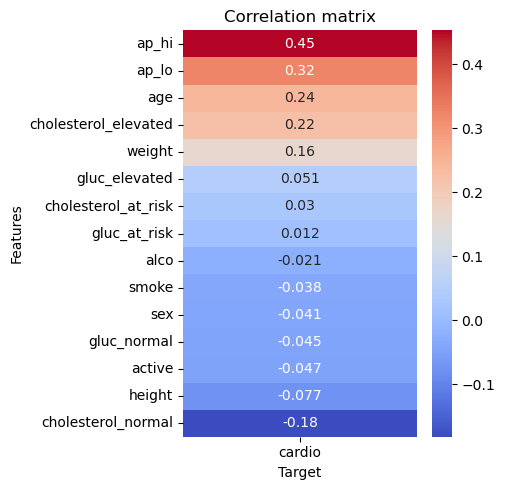

Top 5 features based on correlation matrix:  ['ap_hi', 'ap_lo', 'age', 'cholesterol_elevated', 'cholesterol_normal']


In [27]:
# Set the features and the target
features = ['age','sex','height','weight','ap_hi','ap_lo','smoke','alco','active','cholesterol_at_risk','cholesterol_elevated','cholesterol_normal','gluc_at_risk','gluc_elevated','gluc_normal']
target = ['cardio']

# Get correlation matrix
corr_matrix = cardio_data.corr().loc[features, target]

# Sort the values
corr_matrix = corr_matrix.sort_values(by=target, ascending=False)

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax).set(
    title='Correlation matrix',
    xlabel='Target',
    ylabel='Features')

plt.tight_layout()
plt.show()

# Extract the strongest correlations
# 1. return a dataframe which consists of absolute values of each element
# 2. sort these in descending order by target class (cardio)
# 3. Take first 5 rows
# 4. Take their indexes as they are the names for features
# 5. convert the series to a list
filter_features = corr_matrix.abs().sort_values(by=target, ascending=False)[:5].index.tolist()

# Get the top 5 features with the strongest correlation
print('Top 5 features based on correlation matrix: ', filter_features)

<font color = green>The strongest (Pearson's) correlation coefficients are for <b><i>systolic pressure (`ap_hi`), diastole pressure (`ap_lo`), age, elevated cholesterol and normal cholesterol</i></b>. The first four mentioned may seem to have a <i>positive correlation</i> with the cardio varible: When age, blood pressure or cholesterol increases within a patient, it may be more likely to have a cardio disease. But the normal cholesterol variable seem to have a <i>negative correlation</i> with the cardio variable: When a patient have a cholesterol level in normal levels, it seems that it would be more unlikely to have a cardio disease. Well, at least we can say, that as there's evidence that increased cholesterol levels increase the risk of getting a cardio disease (WebMD, 2022), there correlations seem quite plausible. 
    
<font color = green>No strong assumptions can be made by only computing the correlations, but we can choose these as the most useful features when predicting the precense of cardio disease, based on the Pearson correlation. We could say that the threshold for decision making is 0.16, when taking absolute value of each correlation coefficient. Let's now fit the k-NN model using only the selected features and examine the results.

Features used: ['ap_hi', 'ap_lo', 'age', 'cholesterol_elevated', 'cholesterol_normal']

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       143
           1       0.56      0.49      0.52        57

    accuracy                           0.74       200
   macro avg       0.68      0.67      0.67       200
weighted avg       0.74      0.74      0.74       200

More precise accuracy: 0.745


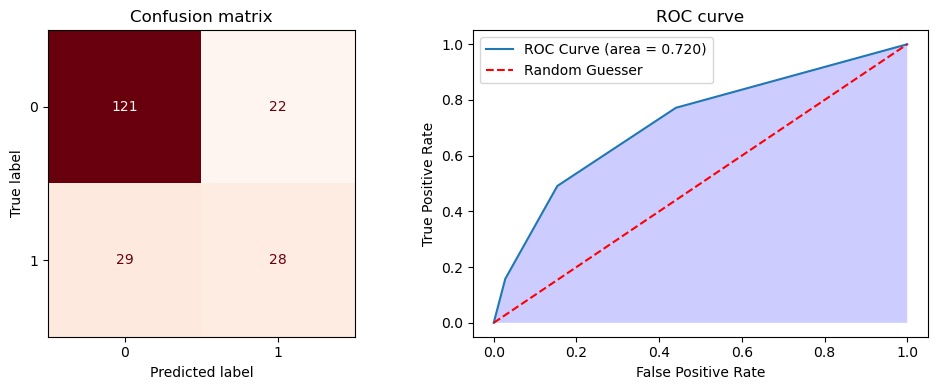

In [44]:
# Use only the selected features
filter_features_train = scaled_features_train.copy().loc[:, filter_features]
filter_features_test = scaled_features_test.copy().loc[:, filter_features]

# Fit the k-NN model and use the only the selected features
evaluate_feature_selection(filter_features_train, filter_features_test, labels_bonus_train, labels_bonus_test)

<font color = green>Seems that we ended up with a little better accuracy than in the exercise 1D (<b>0.745</b> > 0.735) with the selected features. The AUROC score for the k-NN model fitted in the first exercise is lower than the one we got with limited features (<b>0.720</b> > 0.70). The k-NN model was able to predict 28 sick ones correctly which is 2 more than with the previous model (i.e. -2 FN and +2 TN). All the other but the selected features didn't seem to have any correlation with the cardio variable, they don't add any extra to modeling itself. It seems that most of the dummy and binary variables (glucose levels, alcohol, smoke, active and sex) and the numerical variables height and weight aren't that necessary variables when predicting cardio disease. 

### <font color = green> 2. Embedded method

<font color = green>As an embedded method, I use <b>Random Forest classifier</b>. The idea of the algorithm is to split the training data using <i>bootstrapping</i>, fit multiple <i>decision trees</i> with resulted splits, and finally, mix these results together by <i>soft voting</i>. (Malato, 2021.) Quite many terms which are not represented earlier so I've a brief definition for each below:
    
- <font color = green><b>bootstrapping</b>: A resampling method that samples a given dataset with <i>replacement</i>. Commonly used sample size is the one of the original data set, so without replacement, we'd always end up with a sample exactly like the original dataset. (Brownlee, 2018.)
- <font color = green><b>decision tree</b>: Decision trees are supervised learning methods which predict values by learning decision rules based on the properties of the given data. (Wikipedia, 2022.)
- <font color = green><b>soft voting</b>: As there are many (decision) trees in the (random) forest, the subresult of each tree needs to be considered in order to formulate the final results. Soft voting means that we sum the predicted <i>probabilities</i> together for each class, and choose the class with the largest one. [When comparing to hard voting, then we would be using the labels instead of probabilities and choose the class with the most predicted labels.] (Brownlee, 2021.)
    
<font color = green>In the context of feature selection, Random Forests are used to calculate the <i>importance</i> of a feature. Each tree is given a subset of the features (not all of them!), and at each node it splits the samples into two "buckets" based on how <i>similar</i> those individual samples are to each other. The "purer" the bucket, the more important the feature is. (Dubey, 2018; Malato, 2021.)
    
<font color = green>Let's run the Random Forest Classifier to find out the importance of each feature, and then test the k-NN model using these "most important" features.

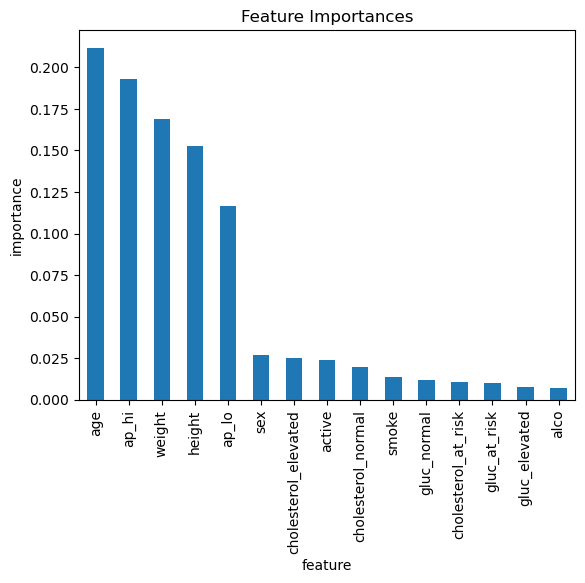

The highest importance features selected by Random Forest:  ['age', 'height', 'weight', 'ap_hi', 'ap_lo']


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Setup a Random Forest Classifier
# n_estimator -> how many trees there are in the forest
random_forest = RandomForestClassifier(n_estimators = 100, random_state=0)

# Setup a model selection algorithm
select_model = SelectFromModel(random_forest, max_features=5, threshold=-np.inf)

# Fit it ONLY with TRAINING SET
select_model.fit(scaled_features_train, labels_train)

# Plot the importances of each variable
forest_importance = pd.Series(select_model.estimator_.feature_importances_, 
                              index = scaled_features_train.columns).sort_values(ascending=False)
forest_importance.plot(kind='bar', xlabel='feature', ylabel='importance', title='Feature Importances')
plt.show()

embedded_features = scaled_features_train.columns[select_model.get_support()]
print('The highest importance features selected by Random Forest: ', embedded_features.tolist())

<font color = green>The Random Forest method suggested that the most useful features would be <i><b>age, height, weight, systolic pressure and diastole pressure</b></i>: This time only numerical variables seemed to be the most "important" features in the cardio dataset. I.e. variables about cholesterol levels changed into height and weight. Let's see how the k-NN performs with the new subset of features.
    
<font color = green>We could use a threshold of anything between the large jump - say, 0.1 - for the feature importance. The importance gap is so obvious between the numerical variables and the dummy variables that there's not really need to set any tight threshold.  

Features used: ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       143
           1       0.49      0.51      0.50        57

    accuracy                           0.71       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.71      0.71      0.71       200

More precise accuracy: 0.71


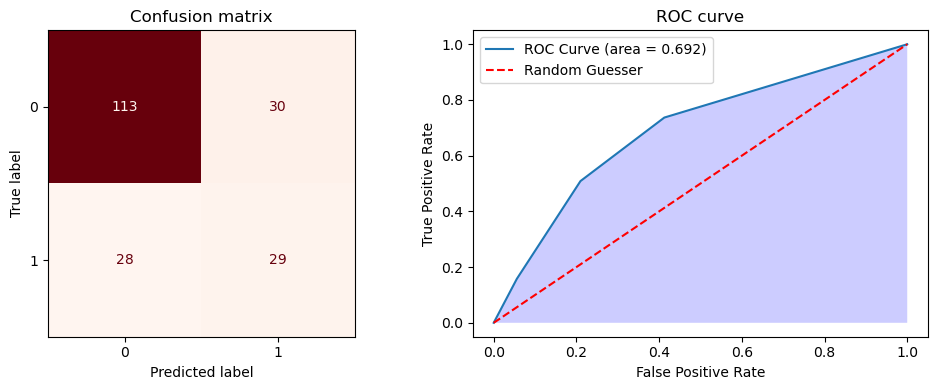

In [59]:
# We can use the transform function of the SelectFromModel class
# to reduce the whole training/testing set to include only the selected features
embedded_features_train = pd.DataFrame(select_model.transform(scaled_features_train), columns=embedded_features)
embedded_features_test = pd.DataFrame(select_model.transform(scaled_features_test), columns=embedded_features)

# Fit the k-NN model and use the only the selected features
evaluate_feature_selection(embedded_features_train, embedded_features_test, labels_bonus_train, labels_bonus_test)

<font color = green>Well, the accuracy is now less than previously (<b>0.71</b> < 0.735 < 0.745), and so is the AUROC score (<b>0.692</b> < 0.70 < 0.720). The healthy ones are correctly predicted 113 times and falsely predicted to be sick ones 30 times, which is quite a change from the previous confusion matrices (TP 121 / TN 22). It seems that when selecting only the numerical variables, the model is no longer so certain predicting healthy ones. Thus, some of the dummy and binary variables seem to have value in distincting between healthy and sick people.

### <font color = green> 3. Wrapper method

<font color = green>There are three opinion here: <i>forward</i>, <i>backward</i> or <i>exhaustive</i> search. The two first methods are offered by skicit-learn, but the latter one needs either an additional library - `mlxtend` - to be installed or a selfmade function. The main difference between the mentioned wrapper methods are the way they are going through the feature space (referring to Kaushik (2016)):
    
- <font color = green><b>Forward</b> method starts with no features. The features are added one after another so that we always select the one which best improves the performance of the model. Searching is stopped when an addition of a new variable doesn't improve the perfomance anymore.
    - <font color = green>5 features: 5 iterations
- <font color = green><b>Backward</b> method starts with all the features. The features are removed one after another so that the performance of the model keeps improving. When no improvement is noticed, searching is stopped.
    - <font color = green>5 features: 10 iterations
- <font color = green><b>Exhaustive</b> method iterates over all the possible subsets to find the optimal one.
    - <font color = green>5 features: ${15\choose 5}=3003$ different subsets
    
<font color = green>Let's try the forward and backdward methods as they are not that computational expensive and with them we only need the class [`SequentialFeatureSelector` from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector). The `SequentialFeatureSelector` is basically sequentially either adding or removing features to find the subset. The decision about the selected features is based on cross validation. I'll use the k-NN model again, but now as it needs to be set as a parameter, I'm trying few different k values 

In [78]:
from sklearn.feature_selection import SequentialFeatureSelector

# Setup the sequential feature selector for both, forward and backward
# Parameters: 
# -----------
# estimator: an unfitted estimator
# n_features_to_select: 5 as we want to have a subset of 5 features 
# direction: whether to perform forward selection or backward selection
# scoring: a scoring metric to evaluate the predictions 
# cv: determines the cross validation split strategy 

forward_sfs = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3), 
                                            n_features_to_select = 5,
                                            direction = 'forward', 
                                            scoring = 'accuracy',
                                            cv = LeaveOneOut(),
                                            n_jobs = -1)

# Fit the feature selector
forward_sfs.fit(scaled_features_train, labels_bonus_train)
forward_features = scaled_features_train.columns[forward_sfs.get_support()]
print('The subset with forward feature selection: ', forward_features.tolist())

backward_sfs = SequentialFeatureSelector(KNeighborsClassifier(n_neighbors=3), 
                                        n_features_to_select = 5,
                                        direction = 'backward', 
                                        scoring = 'accuracy',
                                        cv = LeaveOneOut(),
                                        n_jobs = -1)

# Fit the feature selector
backward_sfs.fit(scaled_features_train, labels_bonus_train)
backward_features = scaled_features_train.columns[backward_sfs.get_support()]
print('The subset with backward feature selection: ', backward_features.tolist())

The subset with forward feature selection:  ['sex', 'ap_hi', 'cholesterol_elevated', 'gluc_at_risk', 'gluc_normal']
The subset with backward feature selection:  ['weight', 'ap_hi', 'active', 'cholesterol_normal', 'gluc_at_risk']


Features used: ['sex', 'ap_hi', 'cholesterol_elevated', 'gluc_at_risk', 'gluc_normal']

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       143
           1       0.65      0.54      0.59        57

    accuracy                           0.79       200
   macro avg       0.74      0.71      0.72       200
weighted avg       0.78      0.79      0.78       200

More precise accuracy: 0.785


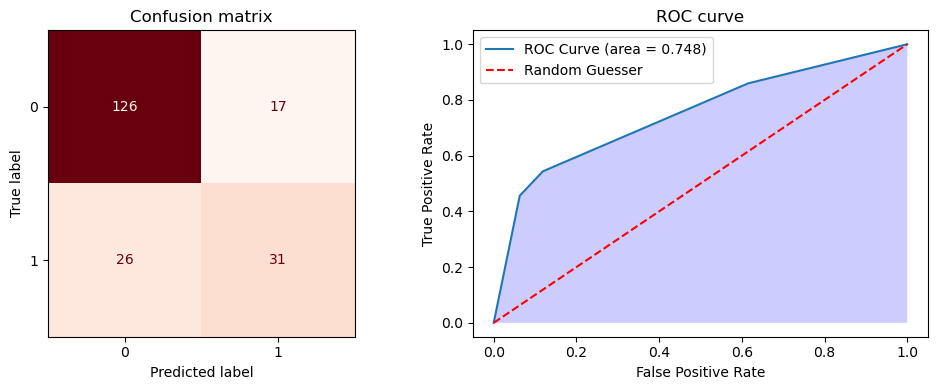

In [79]:
# -------- Forward Feature Selection ---------
# Use only selected features
forward_features_train = scaled_features_train.copy()[forward_features]
forward_features_test = scaled_features_test.copy()[forward_features]

# Fit the k-NN model and use the only the selected features
evaluate_feature_selection(forward_features_train, forward_features_test, labels_bonus_train, labels_bonus_test)

<font color = green>First, the forward selection method. It seems that this method improves the performance of the k-NN model significantly (<b>0.785</b> > 0.745 > 0.735 > 0.71) and this time, most of the variables chosen are dummy variables. The binary variable `sex` and the dummy variables `gluc_at_risk`, `gluc_normal` and `cholesterol_elevated` seem to have quite an impact when predicting cardio diseases. Well, the high glucose levels are shown to damage blood vessels and nerves controlling the heart, and the people with diabetes are more likely to have other conditions like high blood pressure and too much bad cholesterol which increase the risk for the cardio disease (CDC, 2022), so there seems to be some sort of logic behind selecting the variables.
    
<font color = green>The confusion matrix shows that the model was able to predict healthy ones and sick ones correctly more than the previous models: if thinking about "the base case" from the exercise 1D, both the classes were correctly predicted 5 individuals more. These results also increase the AUROC score (<b>0.748</b> < 0.72 < 0.70 < 0.692). The k-NN model was again better distinguishing the healthy ones from the sick ones. 

Features used: ['weight', 'ap_hi', 'active', 'cholesterol_normal', 'gluc_at_risk']

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       143
           1       0.65      0.53      0.58        57

    accuracy                           0.79       200
   macro avg       0.74      0.71      0.72       200
weighted avg       0.78      0.79      0.78       200

More precise accuracy: 0.785


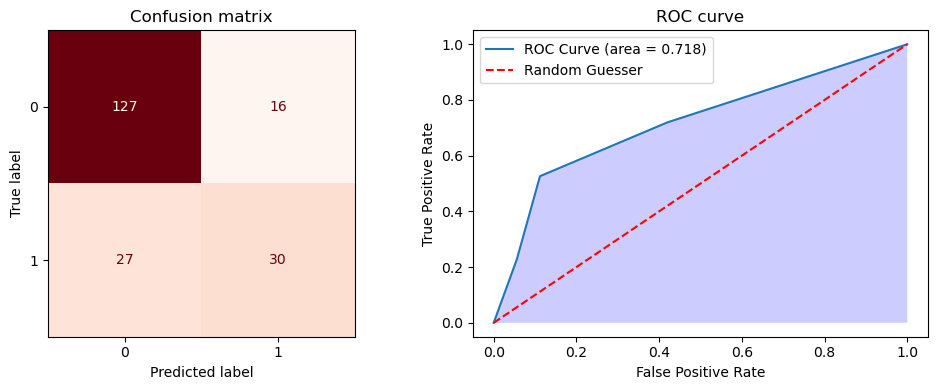

In [80]:
# -------- Backward Feature Selection ---------
# Use only selected features 
backward_features_train = scaled_features_train.copy()[backward_features]
backward_features_test = scaled_features_test.copy()[backward_features]

# Fit the k-NN model and use the only the selected features
evaluate_feature_selection(backward_features_train, backward_features_test, labels_bonus_train, labels_bonus_test)

<font color = green>Then, the backward selection method. Only the features `ap_hi` and `gluc_at_risk` were chosen by both the wrapper methods. The other features the backward method selected are `active`, `cholesterol_normal` and `weight`. The overall accuracy stays similar though. The difference in predictions is that there is one more healthy correctly predicted individual and one less sick correctly predicted individual: With this spesific feature subset, the k-NN model made some progress in predicting the healthy, but had a little more difficulty in distinguishing the sick ones from the healthy ones.  This shows up as the decreasing AUROC score comapred to the forward method (<b>0.718</b> < 0.748). 

### <font color = green>Summa summarum

<font color = green>Among all the feature selection methods, the <b>forward feature selection</b> was able to improve the performance of the k-NN model (when k=3) the most according to both the accuracy and AUROC. So, within this exercise, the wrapper methods were better at finding the "most useful" features when predicting the precense of the cardio disease. Sure, if we'd use more time to find another filter or embedded methods, we could have found other kinds of combinations of the given features as the optimal subset.
    
<font color = green>The most interesting finding was that in this spesific experiment, the dummy variables seemed to have quite a large impact on the prediction power of the k-NN model. 

---------

<font color = green><b>References</b>

<font color = green>Airola, A. (2022a). <i>Data Analysis and Knowledge Discovery - Data Understanding</i>. Lecture slides.
    
<font color = green>Airola, A. (2022b). <i>Data Analysis and Knowledge Discovery - Feature selection</i>. Lecture slides.
    
<font color = green>Brownlee, J. (2018). <i>A Gentle Introduction to the Bootstrap Method</i>. Retrieved 5 Dec 2022, from https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
    
<font color = green>Brownlee, J. (2021). <i>How to Develop Voting Ensembles With Python</i>. Retrieved 5 Dec 2022, from https://machinelearningmastery.com/voting-ensembles-with-python/   
    
<font color = green>Centers for Disease Control and Prevention [CDC]. (2022). <i>Diabetes and Your Heart</i>. Retrieved 5 Dec 2022, from https://www.cdc.gov/diabetes/library/features/diabetes-and-heart.html     
   
<font color = green>Dubey, A. (2018). <i>Feature Selection Using Random forest</i>. Retrieved 7 Dec 2022, from https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f     

<font color = green>Kaushik, S. (2016). <i>Introduction to Feature Selection methods with an example (or how to select the right variables?)</i> Retrieved 7 Dec 2022, from https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/ 
    
<font color = green>Malato, G. (2021). <i>Feature selection with Random Forest</i>. Retrieved 7 Dec 2022, from https://www.yourdatateacher.com/2021/10/11/feature-selection-with-random-forest/

<font color = green>WebMD, J. (2022). <i>Heart Disease and Lowering Cholesterol</i>. Retrieved 5 Dec 2022, from https://www.webmd.com/heart-disease/guide/heart-disease-lower-cholesterol-risk     
    
<font color = green>Wikipedia. (2022). <i>Decision tree learning</i>. Retrieved 5 Dec 2022, from https://en.wikipedia.org/wiki/Decision_tree_learning